In [15]:
import pandas as pd
df=pd.read_csv('C:\\Users\\HP\\Desktop\\IPL_Dataset\\matches.csv')
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [16]:
import pandas as pd
df=pd.read_csv('C:\\Users\\HP\\Desktop\\IPL_Dataset\\deliveries.csv')
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [18]:
import pandas as pd

# Load data
deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')

# Merge on match ID
merged_df = deliveries.merge(matches, left_on='match_id', right_on='id')

# Save the merged DataFrame to a CSV file
merged_df.to_csv('Merged_Deliveries_Matches.csv', index=False)


In [19]:
import pandas as pd
df=pd.read_csv('Merged_Deliveries_Matches.csv')
df.columns

C:\Users\HP\AppData\Local\Temp\ipykernel_2480\93266527.py:2: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Merged_Deliveries_Matches.csv')


Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'season', 'city', 'date', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied',
       'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue',
       'umpire1', 'umpire2', 'umpire3'],
      dtype='object')

In [22]:
df['season'].value_counts()

season
2013    18177
2012    17767
2011    17013
2010    14498
2019    14328
2014    14300
2018    14290
2016    14096
2017    13862
2015    13652
2009    13606
2008    13489
Name: count, dtype: int64

In [23]:
df.head(5)

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  result  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...  normal   
1     2  DA Warner    S Dhawan  TS Mills              0  ...  normal   
2     3  DA Warner    S Dhawan  TS Mills              0  ...  normal   
3     4  DA Warner    S Dhawan  TS Mills              0  ...  normal   
4     5  DA Warner    S Dhawan  TS Mills              0  ...  normal   

   dl_applied               winner  win_by_runs  win_by_wickets  \
0           0  Sunrisers Hyderabad           35               0   
1           0  Sunrisers Hyderabad           35               0   
2           0  Sunrisers Hyderabad           35               0   
3           0  Sunrisers Hyderabad           35               0   
4           0  Sunrisers Hyderabad           35               0   

   player_of_match                                      venue      umpire1  \
0     Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   
1     Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   
2     Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   
3     Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   
4     Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   

    umpire2 umpire3  
0  NJ Llong     NaN  
1  NJ Llong     NaN  
2  NJ Llong     NaN  
3  NJ Llong     NaN  
4  NJ Llong     NaN  

[5 rows x 39 columns]

#### DATA PREPROCESSING

#### Step 1: Load and Filter Data (2010–2019 Seasons)

In [24]:
import pandas as pd

# Load the merged dataset
df = pd.read_csv('Merged_Deliveries_Matches.csv')

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filter seasons from 2010 to 2019
df = df[df['season'].between(2010, 2019)]

C:\Users\HP\AppData\Local\Temp\ipykernel_2480\3799545483.py:4: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Merged_Deliveries_Matches.csv')


####  Step 2: Batting Features (per player per match)

In [25]:
# Grouping by match and batsman
batting_df = df.groupby(['match_id', 'batsman']).agg(
    total_runs=('batsman_runs', 'sum'),
    balls_faced=('ball', 'count'),
    fours=('batsman_runs', lambda x: (x == 4).sum()),
    sixes=('batsman_runs', lambda x: (x == 6).sum())
).reset_index()

# Calculate Strike Rate
batting_df['strike_rate'] = (batting_df['total_runs'] / batting_df['balls_faced']) * 100

#### Step 3: Bowling Features (per player per match)

In [26]:
# Filter out extras from deliveries to compute dot balls correctly
legal_deliveries = df[df['wide_runs'] == 0]
legal_deliveries = legal_deliveries[legal_deliveries['noball_runs'] == 0]

# Grouping by match and bowler
bowling_df = legal_deliveries.groupby(['match_id', 'bowler']).agg(
    balls_bowled=('ball', 'count'),
    runs_conceded=('total_runs', 'sum'),
    wickets=('dismissal_kind', lambda x: x.isin([
        'bowled', 'caught', 'lbw', 'stumped', 'hit wicket', 'caught and bowled']).sum()),
    dot_balls=('total_runs', lambda x: (x == 0).sum())
).reset_index()

# Economy rate = runs / overs
bowling_df['economy'] = (bowling_df['runs_conceded'] / (bowling_df['balls_bowled'] / 6)).round(2)

####  Step 4: Fielding Features (per player per match)

In [27]:
# Filter for only dismissals that involve fielders
fielding_df = df[df['fielder'].notna() & df['dismissal_kind'].notna()]

# Grouping by match and fielder
fielding_stats = fielding_df.groupby(['match_id', 'fielder']).agg(
    catches=('dismissal_kind', lambda x: (x == 'caught').sum()),
    run_outs=('dismissal_kind', lambda x: (x == 'run out').sum())
).reset_index()

#### Step 5: Combine All Player Stats per Match

In [28]:
batting_df.rename(columns={'batsman': 'player'}, inplace=True)
bowling_df.rename(columns={'bowler': 'player'}, inplace=True)
fielding_stats.rename(columns={'fielder': 'player'}, inplace=True)

# Merge all stats (outer join to preserve all records)
player_stats = pd.merge(batting_df, bowling_df, how='outer', on=['match_id', 'player'])
player_stats = pd.merge(player_stats, fielding_stats, how='outer', on=['match_id', 'player'])

# Fill NaNs with 0
player_stats.fillna(0, inplace=True)

#### Step 6: Add Team Information per Player

In [29]:
# Create a mapping of batsman to batting team per match
team_mapping = df[['match_id', 'batsman', 'batting_team']].drop_duplicates()
team_mapping.rename(columns={'batsman': 'player', 'batting_team': 'team'}, inplace=True)

# Merge with player stats
player_stats = pd.merge(player_stats, team_mapping, how='left', on=['match_id', 'player'])

In [30]:
print(player_stats.head())


   match_id        player  total_runs  balls_faced  fours  sixes  strike_rate  \
0         1   A Choudhary         6.0          2.0    0.0    1.0   300.000000   
1         1       A Nehra         0.0          0.0    0.0    0.0     0.000000   
2         1       B Kumar         0.0          0.0    0.0    0.0     0.000000   
3         1   BCJ Cutting        16.0          6.0    0.0    2.0   266.666667   
4         1  Bipul Sharma         0.0          0.0    0.0    0.0     0.000000   

   balls_bowled  runs_conceded  wickets  dot_balls  economy  catches  \
0          24.0           51.0      1.0        5.0    12.75      0.0   
1          24.0           41.0      2.0        8.0    10.25      0.0   
2          24.0           27.0      2.0       11.0     6.75      0.0   
3          22.0           33.0      0.0       10.0     9.00      0.0   
4           6.0            4.0      1.0        2.0     4.00      0.0   

   run_outs                         team  
0       0.0  Royal Challengers Bangal

In [36]:
df=pd.read_csv('Player_Stats_With_Teams.csv')
df.columns

Index(['match_id', 'player', 'total_runs', 'balls_faced', 'fours', 'sixes',
       'strike_rate', 'balls_bowled', 'runs_conceded', 'wickets', 'dot_balls',
       'economy', 'catches', 'run_outs', 'team'],
      dtype='object')

#### FEATURE ENGINEERING

In [37]:
import pandas as pd

# Load the preprocessed player stats
player_stats = pd.read_csv('Player_Stats_With_Teams.csv')

In [38]:
import pandas as pd

# Load datasets
player_stats = pd.read_csv("Player_Stats_With_Teams.csv")
merged_df = pd.read_csv("Merged_Deliveries_Matches.csv")

# Select only the columns needed for feature engineering
match_context_cols = ['match_id', 'season', 'date', 'venue', 'city',
                      'batting_team', 'bowling_team', 'team1', 'team2']

# Drop duplicates so each match has a single entry (safe for merging)
match_context = merged_df[match_context_cols].drop_duplicates(subset=['match_id'])

# Merge context into player stats
player_stats_enhanced = pd.merge(player_stats, match_context, how='left', on='match_id')

# Save updated player stats file
player_stats_enhanced.to_csv("Player_Stats_With_Teams_Enhanced.csv", index=False)

print("Feature-engineering-required columns added successfully and saved as 'Player_Stats_With_Teams_Enhanced.csv'")


C:\Users\HP\AppData\Local\Temp\ipykernel_2480\3336037256.py:5: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv("Merged_Deliveries_Matches.csv")


Feature-engineering-required columns added successfully and saved as 'Player_Stats_With_Teams_Enhanced.csv'


#### Step 2: Add Recent Form (Rolling Stats for Last 3/5 Matches) 
##### A rolling average of total runs, wickets, and economy per player across recent matches is calculated

In [40]:
# Sort by player and match for proper rolling computation
player_stats.sort_values(by=['player', 'match_id'], inplace=True)

# Recent form: average over last 3 and 5 matches
player_stats['recent_runs_avg_3'] = player_stats.groupby('player')['total_runs'].transform(lambda x: x.rolling(3, min_periods=1).mean())
player_stats['recent_wickets_avg_3'] = player_stats.groupby('player')['wickets'].transform(lambda x: x.rolling(3, min_periods=1).mean())

player_stats['recent_runs_avg_5'] = player_stats.groupby('player')['total_runs'].transform(lambda x: x.rolling(5, min_periods=1).mean())
player_stats['recent_wickets_avg_5'] = player_stats.groupby('player')['wickets'].transform(lambda x: x.rolling(5, min_periods=1).mean())


#### Step 3: Add Performance vs Opponent Team

In [41]:

player_stats['opponent'] = player_stats.groupby('match_id')['team'].transform(lambda x: x.iloc[::-1].values[0])

# Group stats vs specific opponent
performance_vs_opponent = player_stats.groupby(['player', 'opponent']).agg(
    avg_runs_vs_opp=('total_runs', 'mean'),
    avg_wickets_vs_opp=('wickets', 'mean')
).reset_index()

# Merge back
player_stats = pd.merge(player_stats, performance_vs_opponent, how='left', on=['player', 'opponent'])


####  Step 4: Add Venue-Specific Stats

In [42]:
# Load original merged dataset (if not already part of player_stats)
# Assuming you added 'venue' column in preprocessing

venue_stats = player_stats.groupby(['player', 'venue']).agg(
    avg_runs_venue=('total_runs', 'mean'),
    avg_wickets_venue=('wickets', 'mean')
).reset_index()

player_stats = pd.merge(player_stats, venue_stats, how='left', on=['player', 'venue'])

#### Step 5: Add Averages, Strike Rates, and Economy

In [43]:
# Batting averages
batting_career = player_stats.groupby('player').agg(
    career_runs=('total_runs', 'sum'),
    career_balls=('balls_faced', 'sum'),
    innings=('match_id', 'count')
).reset_index()

batting_career['batting_average'] = batting_career['career_runs'] / batting_career['innings']
batting_career['strike_rate'] = (batting_career['career_runs'] / batting_career['career_balls']) * 100

# Bowling averages
bowling_career = player_stats.groupby('player').agg(
    career_wickets=('wickets', 'sum'),
    career_runs_conceded=('runs_conceded', 'sum'),
    career_balls_bowled=('balls_bowled', 'sum')
).reset_index()

bowling_career['bowling_average'] = bowling_career['career_runs_conceded'] / bowling_career['career_wickets'].replace(0, 1)
bowling_career['economy'] = (bowling_career['career_runs_conceded'] / (bowling_career['career_balls_bowled'] / 6)).round(2)

# Merge all features
player_stats = pd.merge(player_stats, batting_career[['player', 'batting_average', 'strike_rate']], on='player', how='left')
player_stats = pd.merge(player_stats, bowling_career[['player', 'bowling_average', 'economy']], on='player', how='left')


#### Step 6: Classify Player Roles 

In [44]:
def classify_role(row):
    if row['career_wickets'] >= 20 and row['career_runs'] >= 300:
        return 'All-Rounder'
    elif row['career_wickets'] >= 20:
        return 'Bowler'
    elif row['career_runs'] >= 300:
        return 'Batsman'
    else:
        return 'Wicketkeeper'

# Add career runs and wickets to use in role classification
player_stats = pd.merge(player_stats, batting_career[['player', 'career_runs']], on='player', how='left')
player_stats = pd.merge(player_stats, bowling_career[['player', 'career_wickets']], on='player', how='left')

player_stats['player_role'] = player_stats.apply(classify_role, axis=1)


#### Final Step: Save Engineered Data

In [45]:
player_stats.to_csv('Player_Stats_With_Features.csv', index=False)

In [47]:
df=pd.read_csv('Player_Stats_With_Features.csv')
df.columns

Index(['match_id', 'player', 'total_runs', 'balls_faced', 'fours', 'sixes',
       'strike_rate_x', 'balls_bowled', 'runs_conceded', 'wickets',
       'dot_balls', 'economy_x', 'catches', 'run_outs', 'team', 'season',
       'date', 'venue', 'city', 'batting_team', 'bowling_team', 'team1',
       'team2', 'recent_runs_avg_3', 'recent_wickets_avg_3',
       'recent_runs_avg_5', 'recent_wickets_avg_5', 'opponent',
       'avg_runs_vs_opp', 'avg_wickets_vs_opp', 'avg_runs_venue',
       'avg_wickets_venue', 'batting_average', 'strike_rate_y',
       'bowling_average', 'economy_y', 'career_runs', 'career_wickets',
       'player_role'],
      dtype='object')

#### Label Generation Logic 


In [48]:
import pandas as pd

# Load your feature-enhanced dataset
df = pd.read_csv("Player_Stats_With_Teams_Enhanced.csv")

# Step 1: Calculate Points for Each Player
df["batting_points"] = df["total_runs"] + df["fours"] * 1 + df["sixes"] * 2
df["bowling_points"] = df["wickets"] * 25 + df["dot_balls"] * 1
df["fielding_points"] = df["catches"] * 10 + df["run_outs"] * 10
df["total_points"] = df["batting_points"] + df["bowling_points"] + df["fielding_points"]

# Step 2: Rank Players Per Match
df["rank_in_match"] = df.groupby("match_id")["total_points"].rank(method="first", ascending=False)

# Step 3: Generate Label
df["label"] = df["rank_in_match"].apply(lambda x: 1 if x <= 11 else 0)

# Step 4: Drop Intermediate Columns
df.drop(columns=["batting_points", "bowling_points", "fielding_points", "total_points", "rank_in_match"], inplace=True)

# Step 5: Save Final Dataset
df.to_csv("Player_Stats_With_Features.csv", index=False)
print(" File saved as 'Player_Stats_With_Features.csv'")


 File saved as 'Player_Stats_With_Features.csv'


In [50]:
df=pd.read_csv('Player_Stats_With_Features.csv')
df.columns

Index(['match_id', 'player', 'total_runs', 'balls_faced', 'fours', 'sixes',
       'strike_rate', 'balls_bowled', 'runs_conceded', 'wickets', 'dot_balls',
       'economy', 'catches', 'run_outs', 'team', 'season', 'date', 'venue',
       'city', 'batting_team', 'bowling_team', 'team1', 'team2', 'label'],
      dtype='object')

In [51]:
df['label']

0        0
1        1
2        1
3        1
4        0
        ..
13782    0
13783    0
13784    0
13785    1
13786    1
Name: label, Length: 13787, dtype: int64

#### Exploratory Data Analysis

In [ ]:
import pandas as pd
df=pd.read_csv('Player_Stats_With_Features.csv')

In [3]:
df.dtypes

match_id           int64
player            object
total_runs       float64
balls_faced      float64
fours            float64
sixes            float64
strike_rate      float64
balls_bowled     float64
runs_conceded    float64
wickets          float64
dot_balls        float64
economy          float64
catches          float64
run_outs         float64
team              object
season             int64
date              object
venue             object
city              object
batting_team      object
bowling_team      object
team1             object
team2             object
label              int64
dtype: object

In [2]:
df.isnull().sum()

match_id            0
player              0
total_runs          0
balls_faced         0
fours               0
sixes               0
strike_rate         0
balls_bowled        0
runs_conceded       0
wickets             0
dot_balls           0
economy             0
catches             0
run_outs            0
team             4249
season              0
date                0
venue               0
city              152
batting_team        0
bowling_team        0
team1               0
team2               0
label               0
dtype: int64

In [5]:
import pandas as pd
df=pd.read_csv('Player_Stats_With_Features.csv')

def infer_team(row):
    if pd.notna(row['team']):
        return row['team']
    # If the player batted in this match
    if row['player'] in row['batting_team_players']:
        return row['batting_team']
    elif row['player'] in row['bowling_team_players']:
        return row['bowling_team']
    return None

# If no player lists, fallback: use `batting_team` as proxy
df['team'] = df['team'].fillna(df['batting_team'])


In [6]:
df.isnull().sum()

match_id           0
player             0
total_runs         0
balls_faced        0
fours              0
sixes              0
strike_rate        0
balls_bowled       0
runs_conceded      0
wickets            0
dot_balls          0
economy            0
catches            0
run_outs           0
team               0
season             0
date               0
venue              0
city             152
batting_team       0
bowling_team       0
team1              0
team2              0
label              0
dtype: int64

In [7]:
# Create mapping from non-null values
venue_city_map = df[df['city'].notna()].groupby('venue')['city'].agg(lambda x: x.mode()[0])

# Fill missing cities using venue
df['city'] = df.apply(
    lambda row: venue_city_map[row['venue']] if pd.isna(row['city']) and row['venue'] in venue_city_map else row['city'],
    axis=1
)

In [8]:
df.isnull().sum()

match_id           0
player             0
total_runs         0
balls_faced        0
fours              0
sixes              0
strike_rate        0
balls_bowled       0
runs_conceded      0
wickets            0
dot_balls          0
economy            0
catches            0
run_outs           0
team               0
season             0
date               0
venue              0
city             152
batting_team       0
bowling_team       0
team1              0
team2              0
label              0
dtype: int64

In [9]:
missing_venues = df[df['city'].isna()]['venue'].unique()
print("Venues with missing city values:", missing_venues)


Venues with missing city values: ['Dubai International Cricket Stadium']


In [10]:
# Manual mapping for the missing venue
manual_city_map = {
    'Dubai International Cricket Stadium': 'Dubai'
}

# Apply the mapping
df['city'] = df.apply(
    lambda row: manual_city_map[row['venue']] if pd.isna(row['city']) and row['venue'] in manual_city_map else row['city'],
    axis=1
)


In [12]:
df.isnull().sum()

match_id         0
player           0
total_runs       0
balls_faced      0
fours            0
sixes            0
strike_rate      0
balls_bowled     0
runs_conceded    0
wickets          0
dot_balls        0
economy          0
catches          0
run_outs         0
team             0
season           0
date             0
venue            0
city             0
batting_team     0
bowling_team     0
team1            0
team2            0
label            0
dtype: int64

#### Outliers Detection

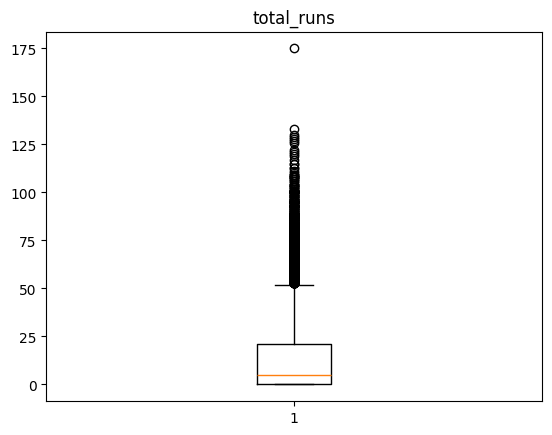

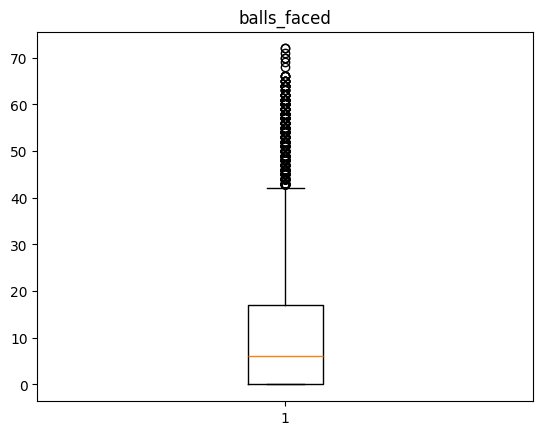

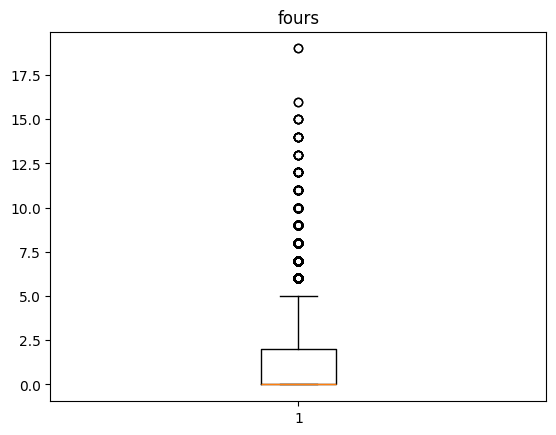

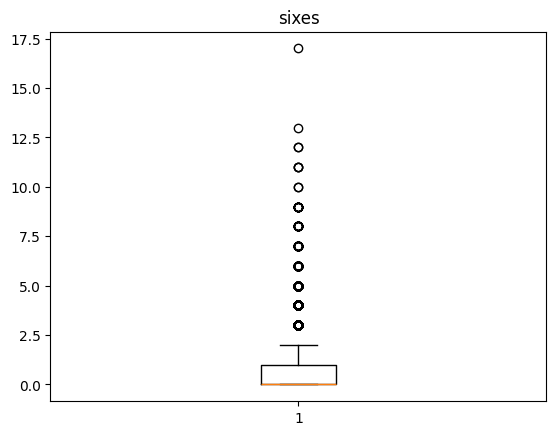

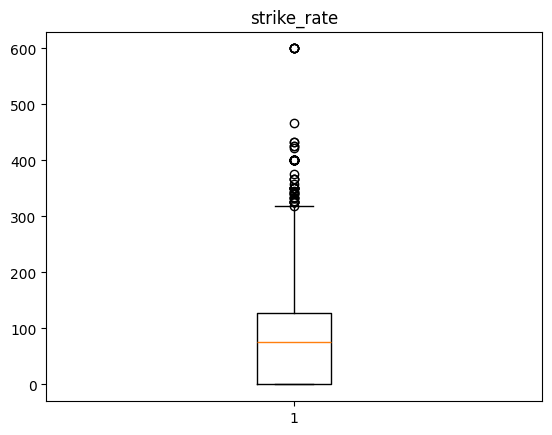

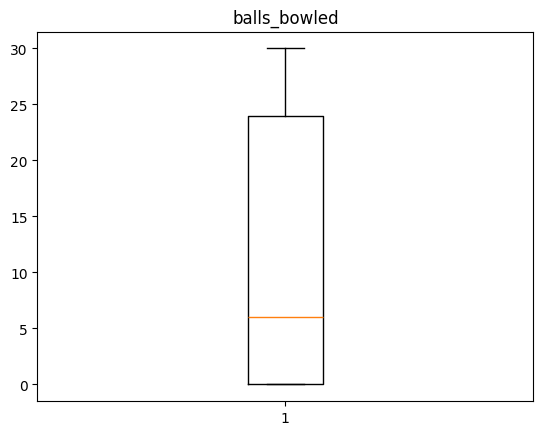

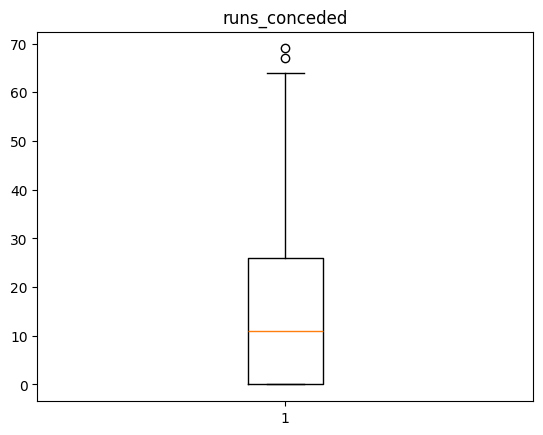

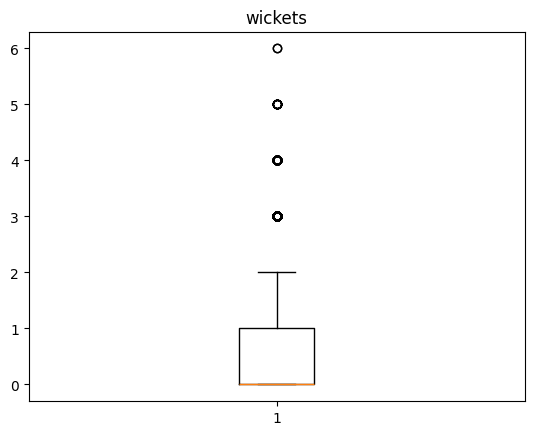

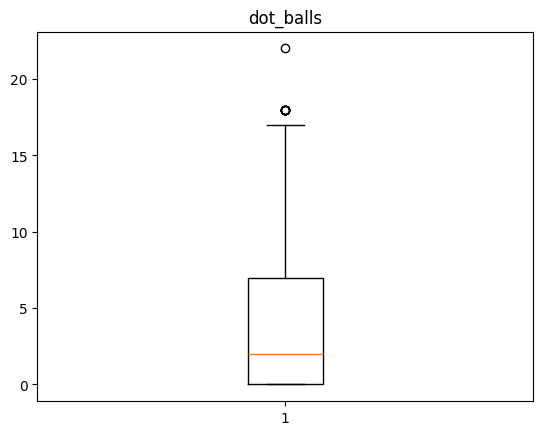

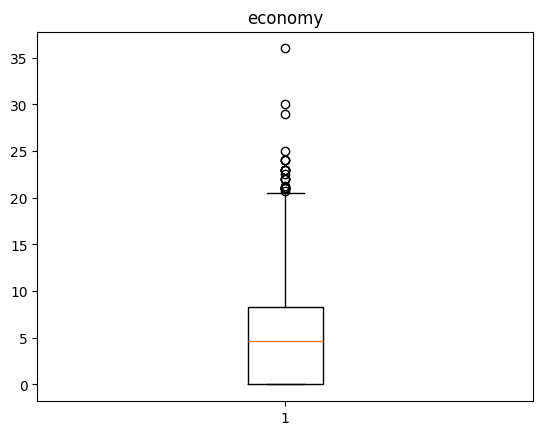

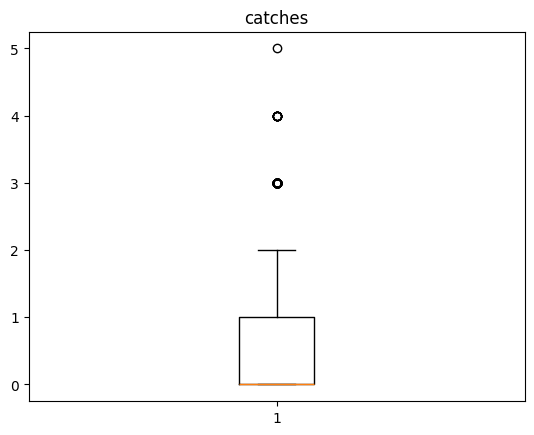

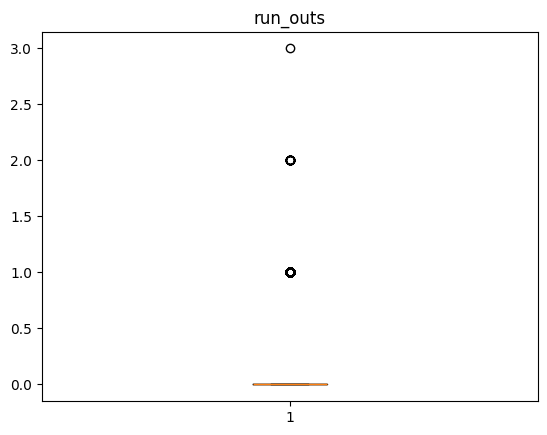

In [ ]:
import matplotlib as plt
df=pd.read_csv('Player_Stats_With_Features.csv')

plt.title('total_runs')
plt.boxplot(df['total_runs'])
plt.show()

plt.title('balls_faced')
plt.boxplot(df['balls_faced'])
plt.show()

plt.title('fours')
plt.boxplot(df['fours'])
plt.show()

plt.title('sixes')
plt.boxplot(df['sixes'])
plt.show()

plt.title('strike_rate')
plt.boxplot(df['strike_rate'])
plt.show()

plt.title('balls_bowled')
plt.boxplot(df['balls_bowled'])
plt.show()

plt.title('runs_conceded')
plt.boxplot(df['runs_conceded'])
plt.show()

plt.title('wickets')
plt.boxplot(df['wickets'])
plt.show()

plt.title('dot_balls')
plt.boxplot(df['dot_balls'])
plt.show()

plt.title('economy')
plt.boxplot(df['economy'])
plt.show()

plt.title('catches')
plt.boxplot(df['catches'])
plt.show()

plt.title('run_outs')
plt.boxplot(df['run_outs'])
plt.show()

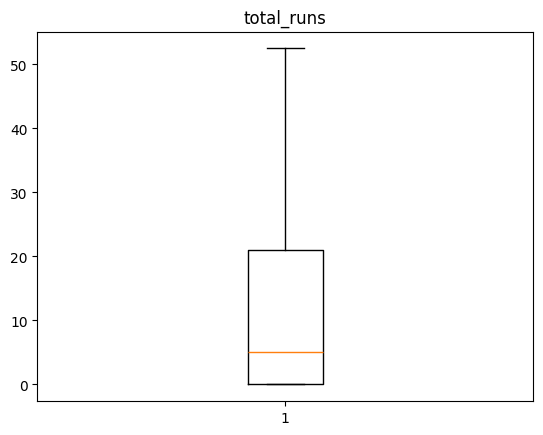

In [40]:
#2. Handling outliers 
Q1=df['total_runs'].quantile(0.25)
Q3=df['total_runs'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound, upper_bound

df.total_runs=df.total_runs.clip(lower_bound,upper_bound)
#After Handling outliers
plt.title('total_runs')
plt.boxplot(df['total_runs'])
plt.show()

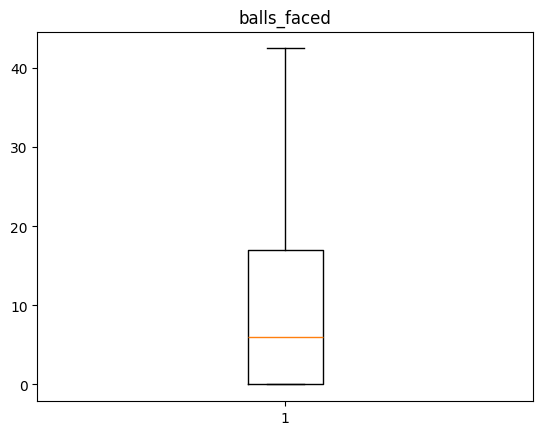

In [39]:
#2. Handling outliers 
Q1=df['balls_faced'].quantile(0.25)
Q3=df['balls_faced'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound, upper_bound

df.balls_faced=df.balls_faced.clip(lower_bound,upper_bound)
#After Handling outliers
plt.title('balls_faced')
plt.boxplot(df['balls_faced'])
plt.show()

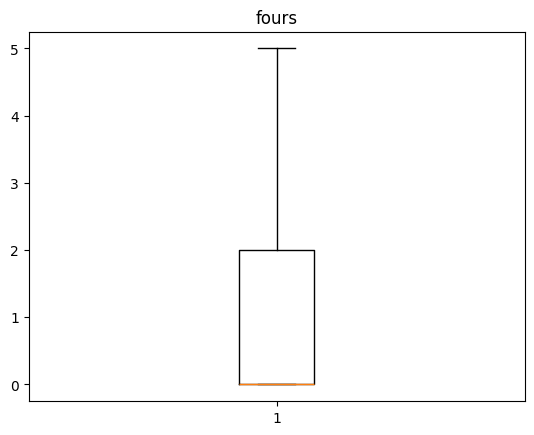

In [38]:
#2. Handling outliers 
Q1=df['fours'].quantile(0.25)
Q3=df['fours'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound, upper_bound

df.fours=df.fours.clip(lower_bound,upper_bound)
#After Handling outliers
plt.title('fours')
plt.boxplot(df['fours'])
plt.show()

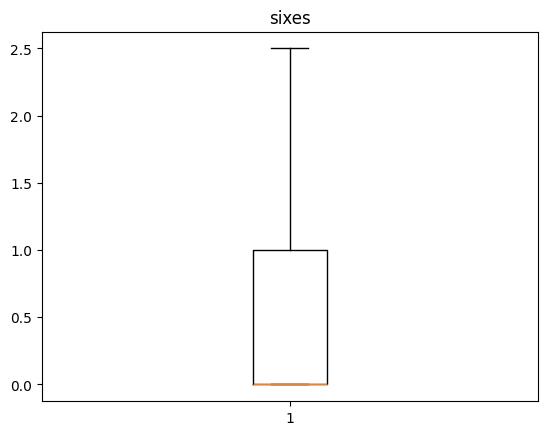

In [37]:
#2. Handling outliers 
Q1=df['sixes'].quantile(0.25)
Q3=df['sixes'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound, upper_bound

df.sixes=df.sixes.clip(lower_bound,upper_bound)
#After Handling outliers
plt.title('sixes')
plt.boxplot(df['sixes'])
plt.show()

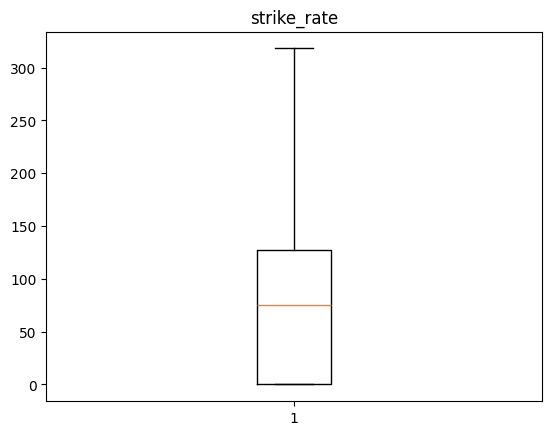

In [36]:
#2. Handling outliers 
Q1=df['strike_rate'].quantile(0.25)
Q3=df['strike_rate'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound, upper_bound

df.strike_rate=df.strike_rate.clip(lower_bound,upper_bound)
#After Handling outliers
plt.title('strike_rate')
plt.boxplot(df['strike_rate'])
plt.show()

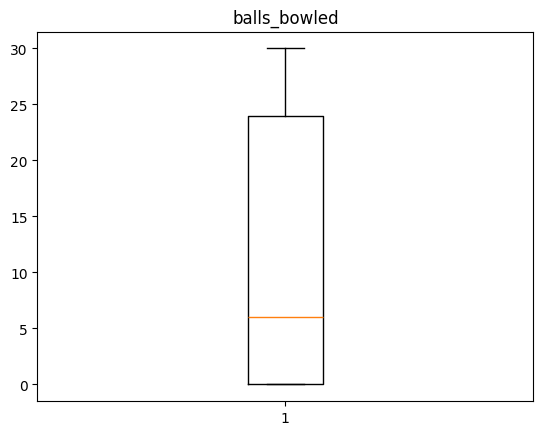

In [35]:
#2. Handling outliers 
Q1=df['balls_bowled'].quantile(0.25)
Q3=df['balls_bowled'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound, upper_bound

df.balls_bowled=df.balls_bowled.clip(lower_bound,upper_bound)
#After Handling outliers
plt.title('balls_bowled')
plt.boxplot(df['balls_bowled'])
plt.show()

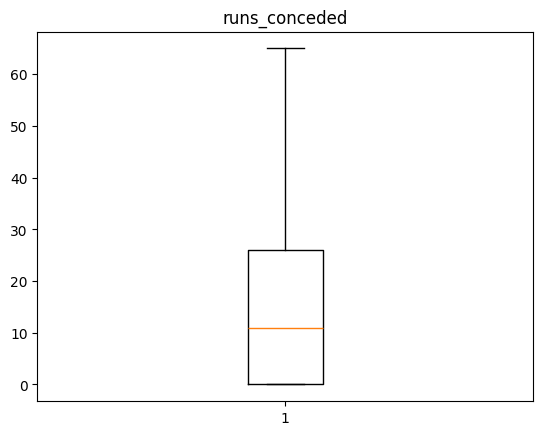

In [34]:
#2. Handling outliers 
Q1=df['runs_conceded'].quantile(0.25)
Q3=df['runs_conceded'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound, upper_bound

df.runs_conceded=df.runs_conceded.clip(lower_bound,upper_bound)
#After Handling outliers
plt.title('runs_conceded')
plt.boxplot(df['runs_conceded'])
plt.show()

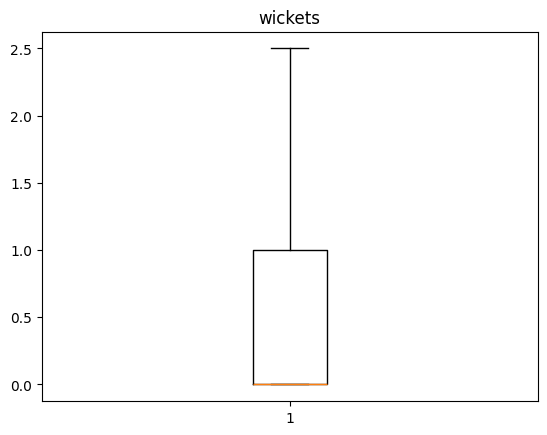

In [33]:
#2. Handling outliers 
Q1=df['wickets'].quantile(0.25)
Q3=df['wickets'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound, upper_bound

df.wickets=df.wickets.clip(lower_bound,upper_bound)
#After Handling outliers
plt.title('wickets')
plt.boxplot(df['wickets'])
plt.show()

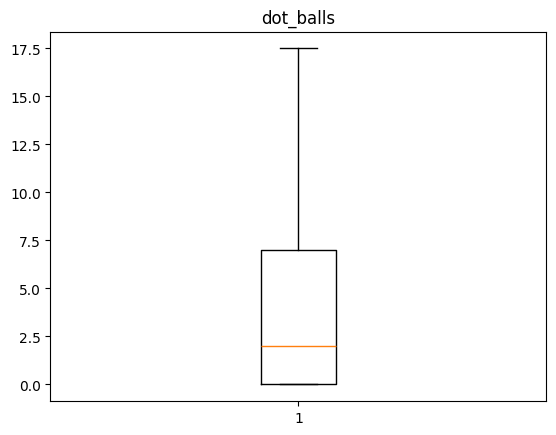

In [32]:
#2. Handling outliers 
Q1=df['dot_balls'].quantile(0.25)
Q3=df['dot_balls'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound, upper_bound

df.dot_balls=df.dot_balls.clip(lower_bound,upper_bound)
#After Handling outliers
plt.title('dot_balls')
plt.boxplot(df['dot_balls'])
plt.show()

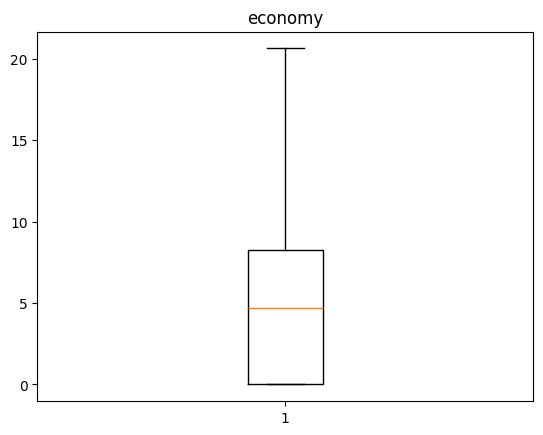

In [31]:
#2. Handling outliers 
Q1=df['economy'].quantile(0.25)
Q3=df['economy'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound, upper_bound

df.economy=df.economy.clip(lower_bound,upper_bound)
#After Handling outliers
plt.title('economy')
plt.boxplot(df['economy'])
plt.show()

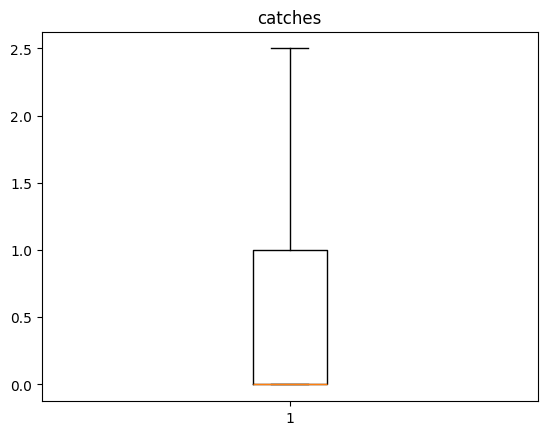

In [30]:
#2. Handling outliers 
Q1=df['catches'].quantile(0.25)
Q3=df['catches'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound, upper_bound

df.catches=df.catches.clip(lower_bound,upper_bound)
#After Handling outliers
plt.title('catches')
plt.boxplot(df['catches'])
plt.show()

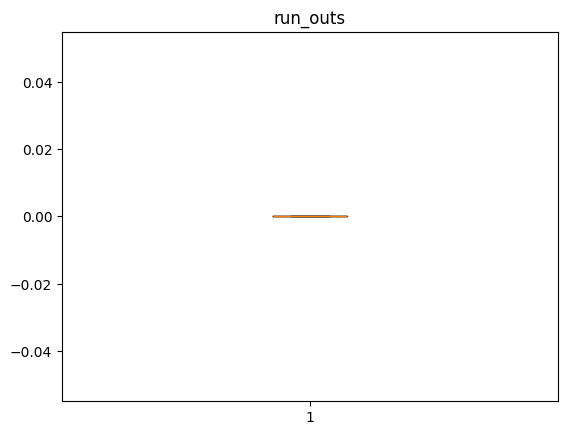

In [29]:
#2. Handling outliers 
Q1=df['run_outs'].quantile(0.25)
Q3=df['run_outs'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound, upper_bound

df.run_outs=df.run_outs.clip(lower_bound,upper_bound)
#After Handling outliers
plt.title('run_outs')
plt.boxplot(df['run_outs'])
plt.show()

In [41]:
df.to_csv('Player_Stats_With_Features_HandOtl.csv')

#### Distribution of the Data

Skewness
Skewness of total_runs : 1.258


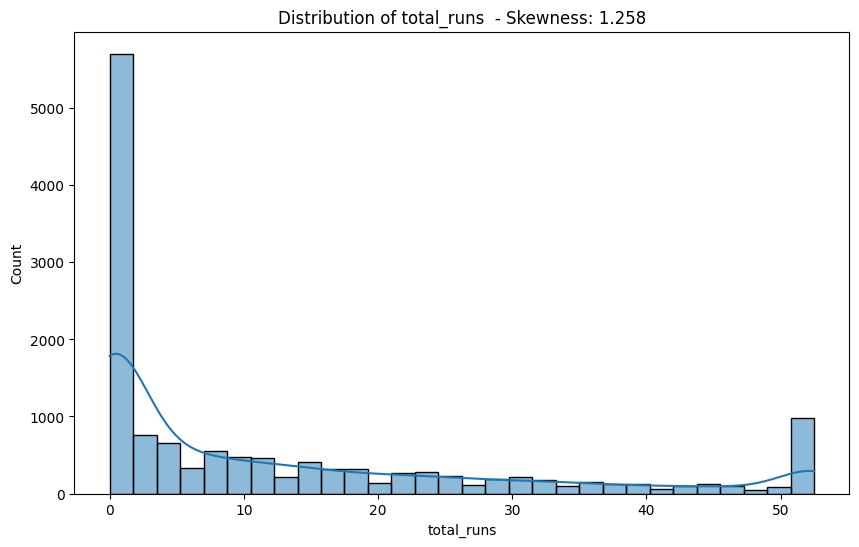

Skewness of balls_faced : 1.202


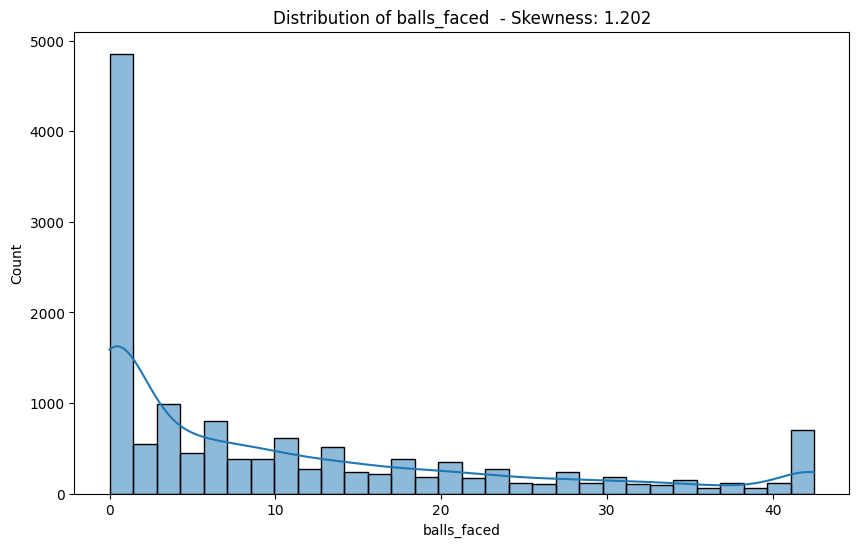

Skewness of fours : 1.330


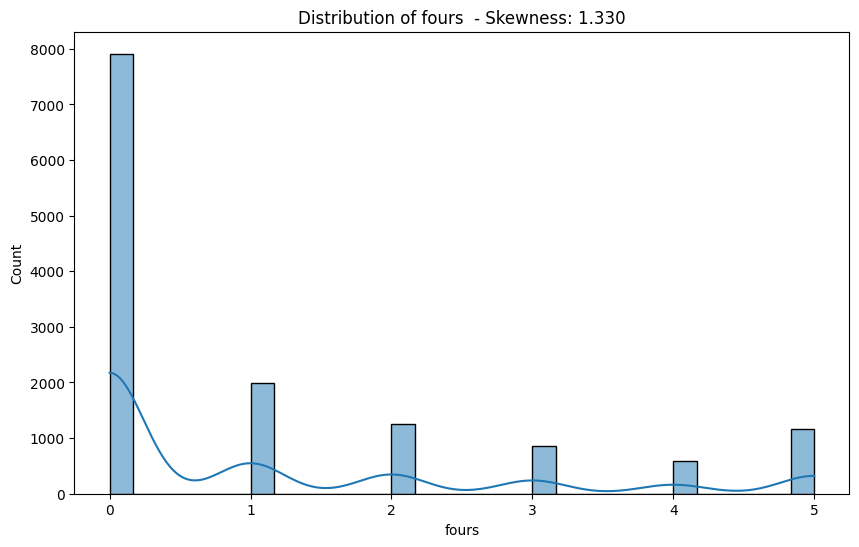

Skewness of sixes : 1.705


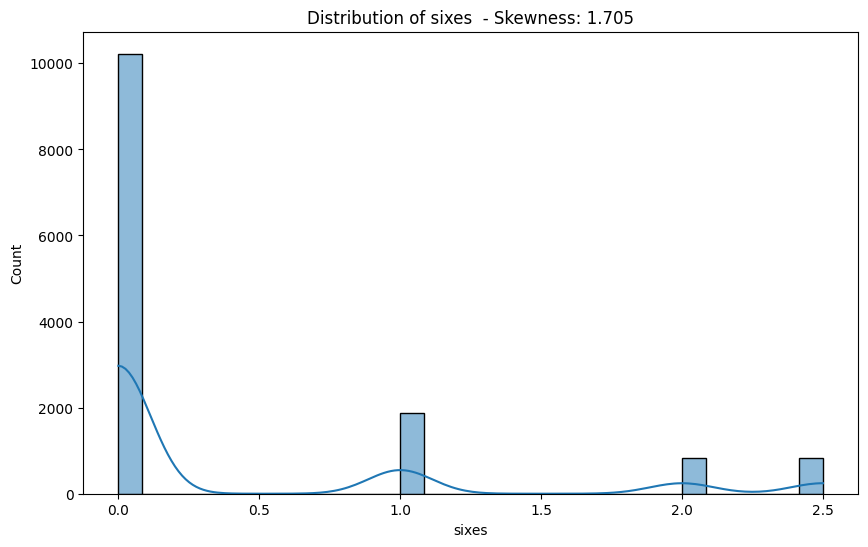

Skewness of strike_rate : 0.619


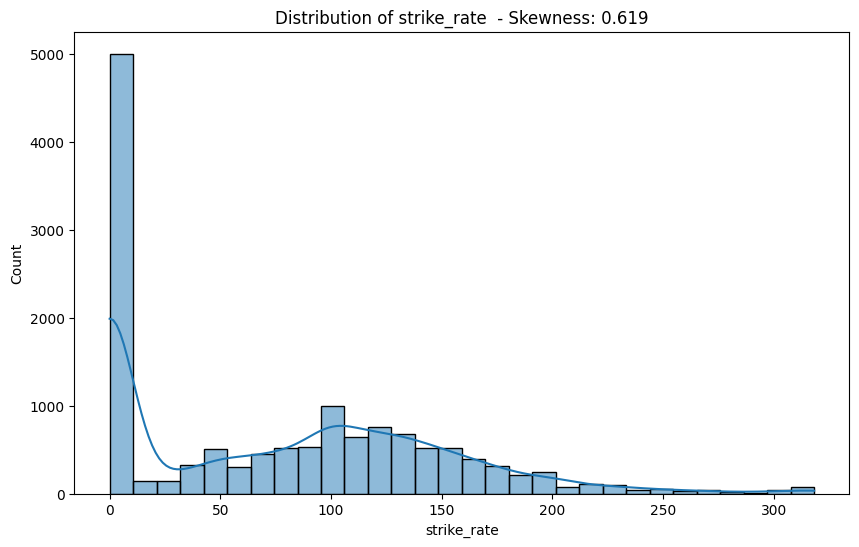

Skewness of balls_bowled : 0.191


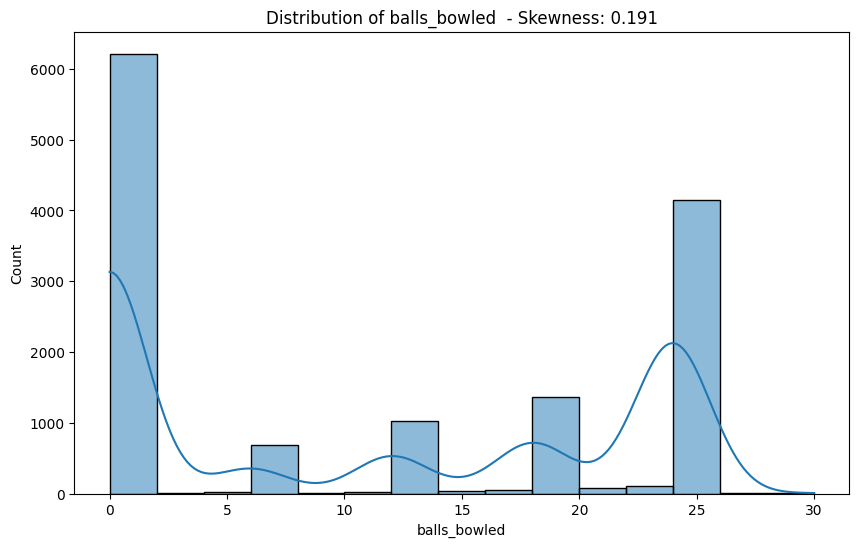

Skewness of runs_conceded : 0.552


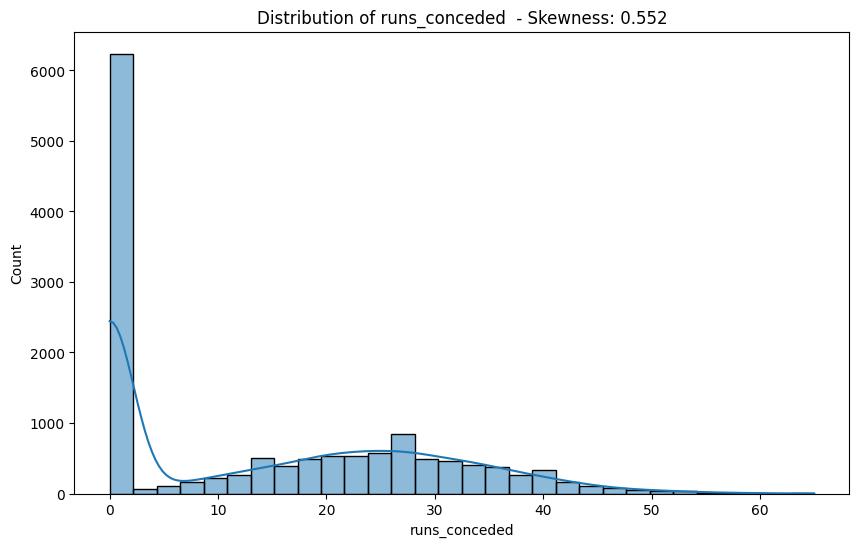

Skewness of wickets : 1.422


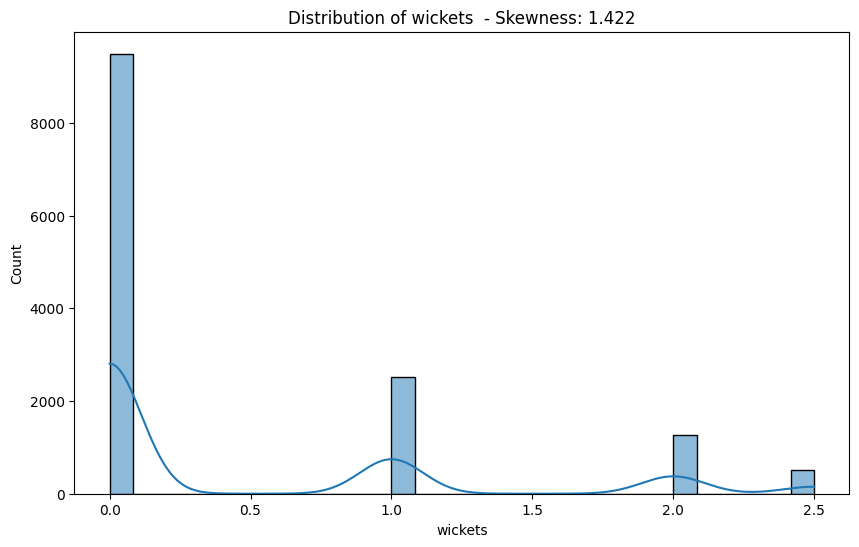

Skewness of dot_balls : 0.780


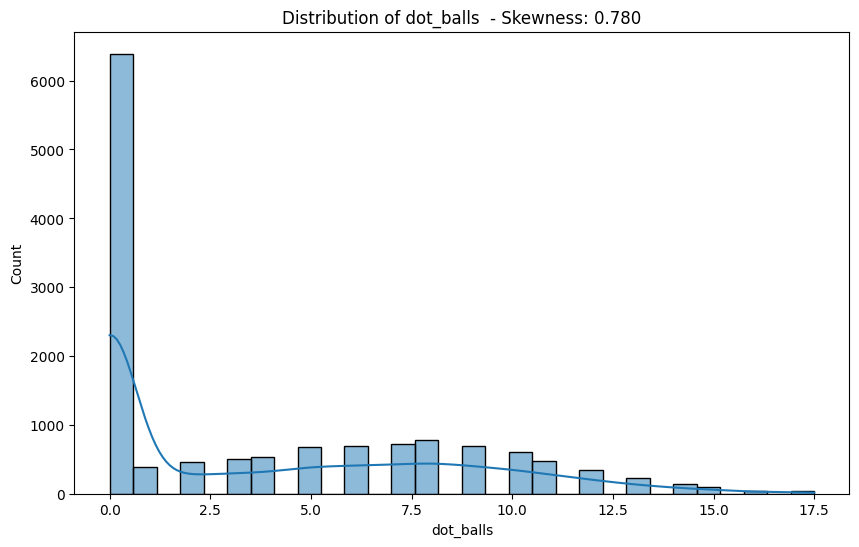

Skewness of economy : 0.515


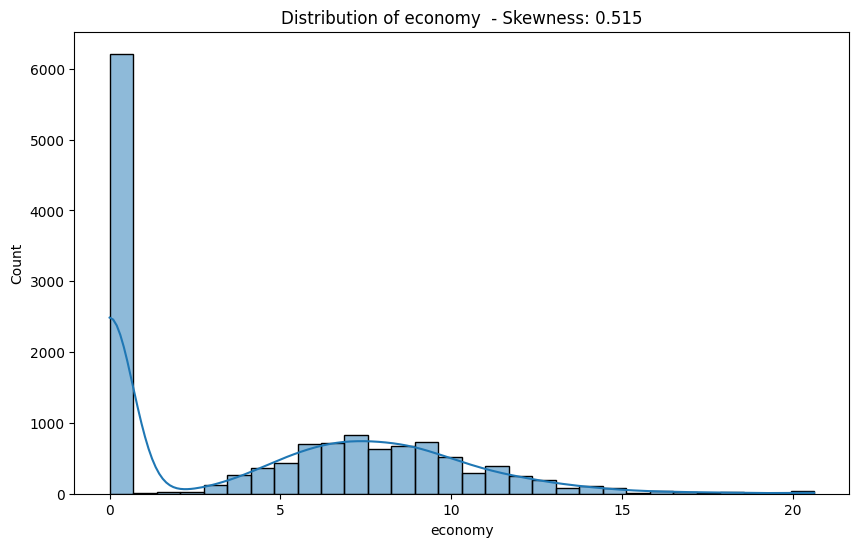

Skewness of catches : 1.673


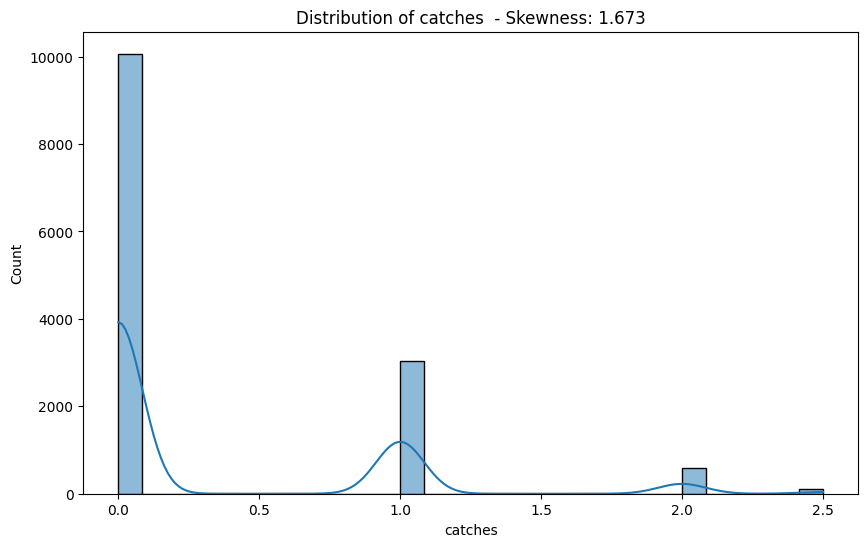

Skewness of run_outs : 0.000


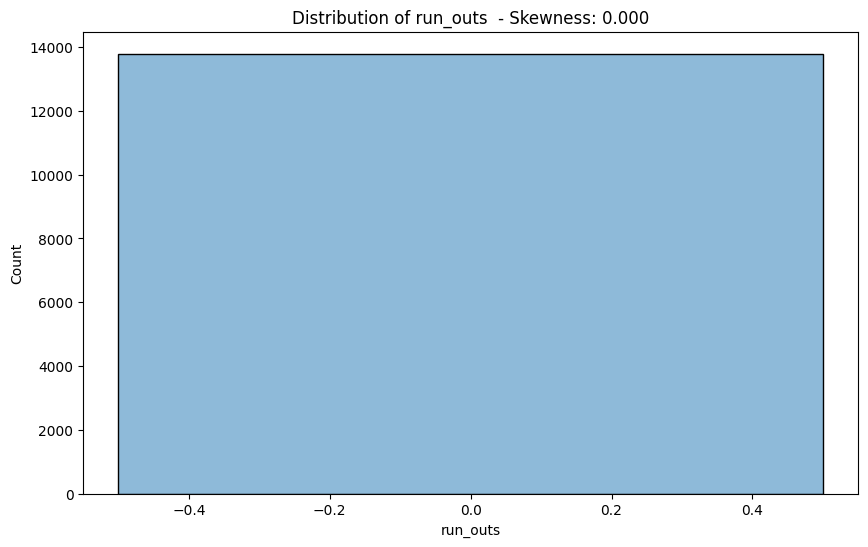

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

# Load the dataset
df=pd.read_csv('Player_Stats_With_Features_HandOtl.csv')

# Identify continuous numerical columns
numerical_cols = df.select_dtypes(include=['float64']).columns

# Function to plot the distribution and calculate skewness
def plot_skewness(df, cols):
    for col in cols:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col].dropna(), kde=True)
        skewness = df[col].skew()
        plt.title(f'Distribution of {col}  - Skewness: {skewness:.3f}')
        print(f"Skewness of {col} : {skewness:.3f}")
        plt.show()

# Plot original distributions and skewness
print("Skewness")
plot_skewness(df, numerical_cols)

Skewness Before Handling Skewness:
Skewness of total_runs Before Skewness Handling: 1.258


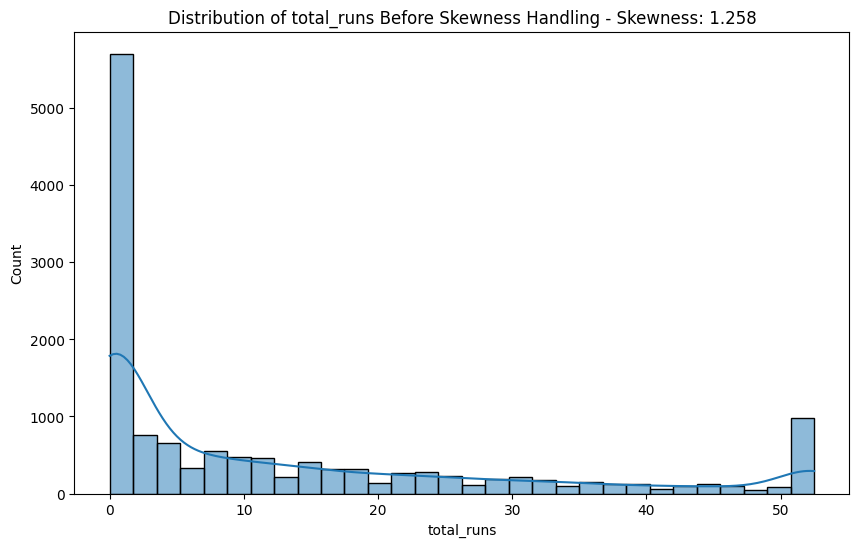

Skewness of balls_faced Before Skewness Handling: 1.202


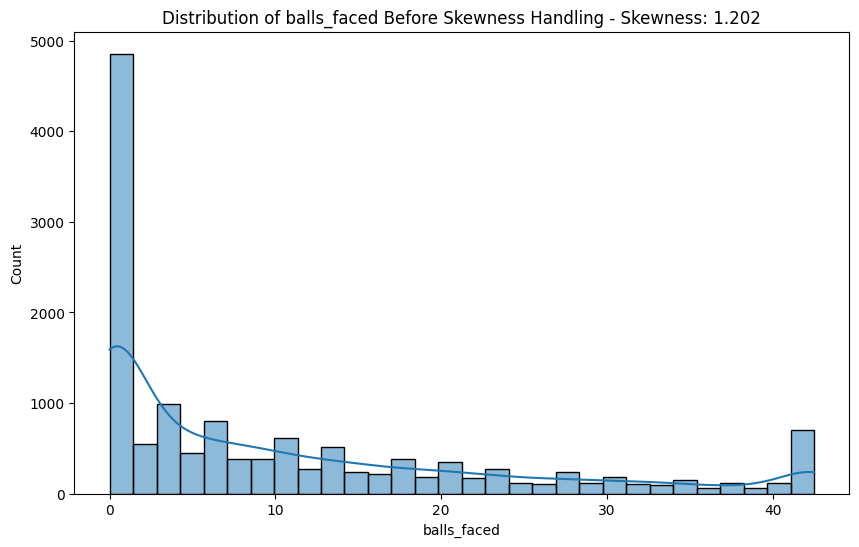

Skewness of fours Before Skewness Handling: 1.330


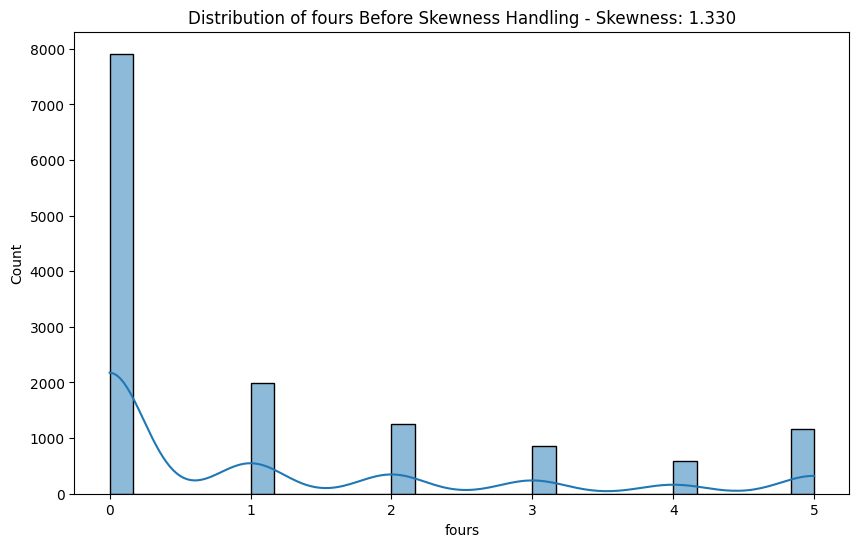

Skewness of sixes Before Skewness Handling: 1.705


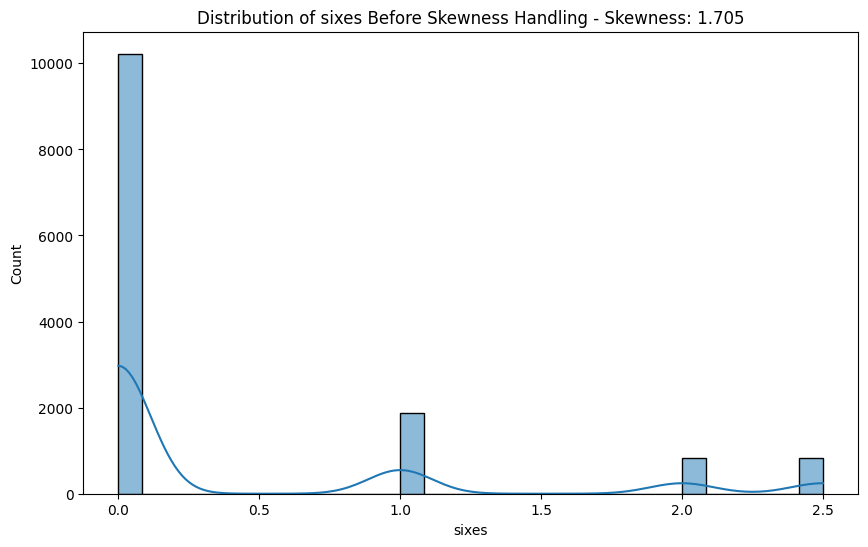

Skewness of strike_rate Before Skewness Handling: 0.619


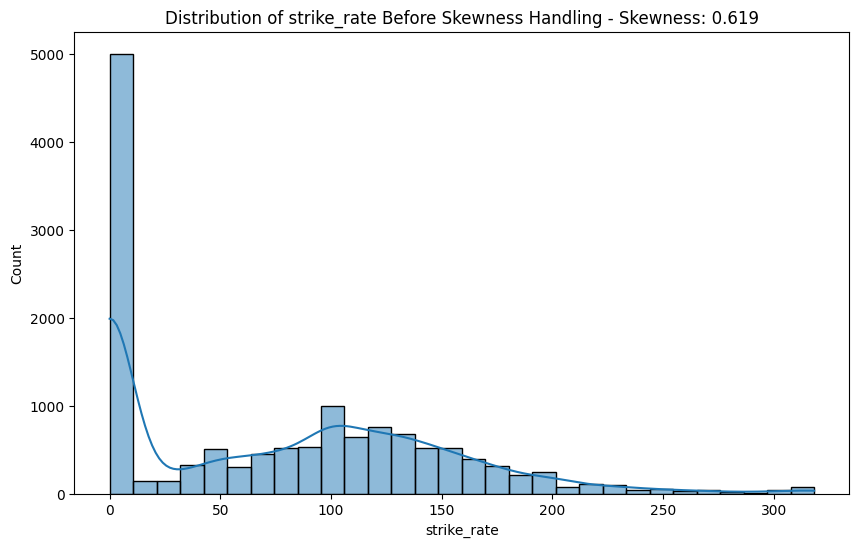

Skewness of balls_bowled Before Skewness Handling: 0.191


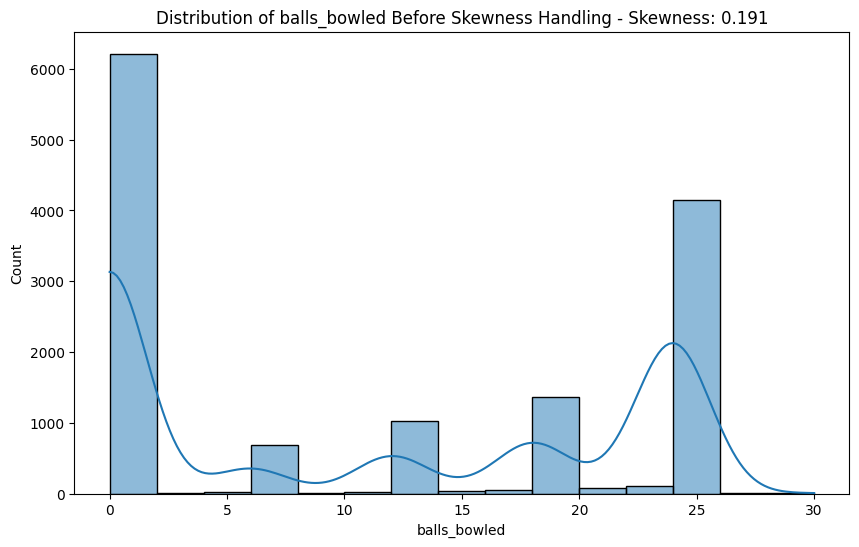

Skewness of runs_conceded Before Skewness Handling: 0.552


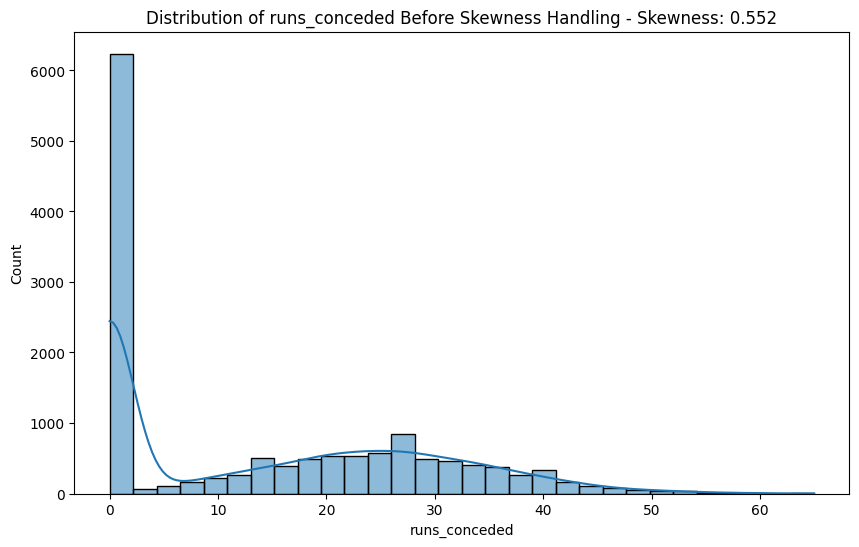

Skewness of wickets Before Skewness Handling: 1.422


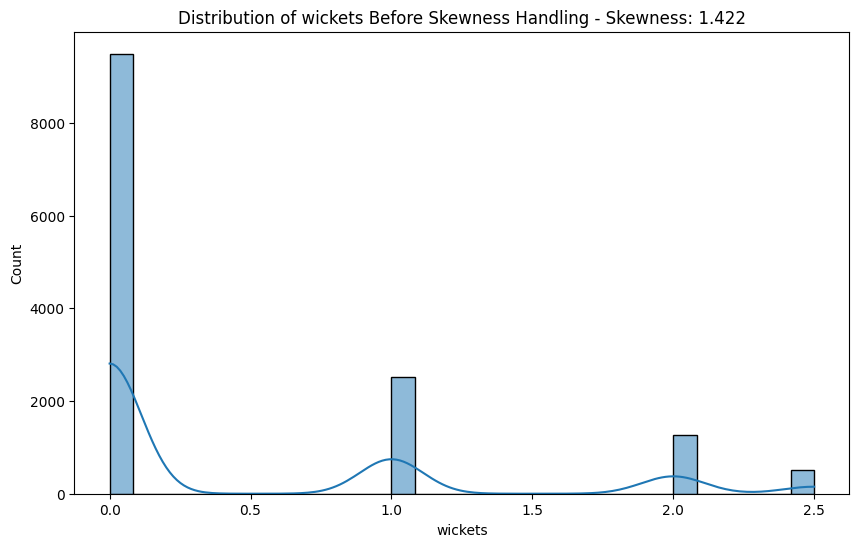

Skewness of dot_balls Before Skewness Handling: 0.780


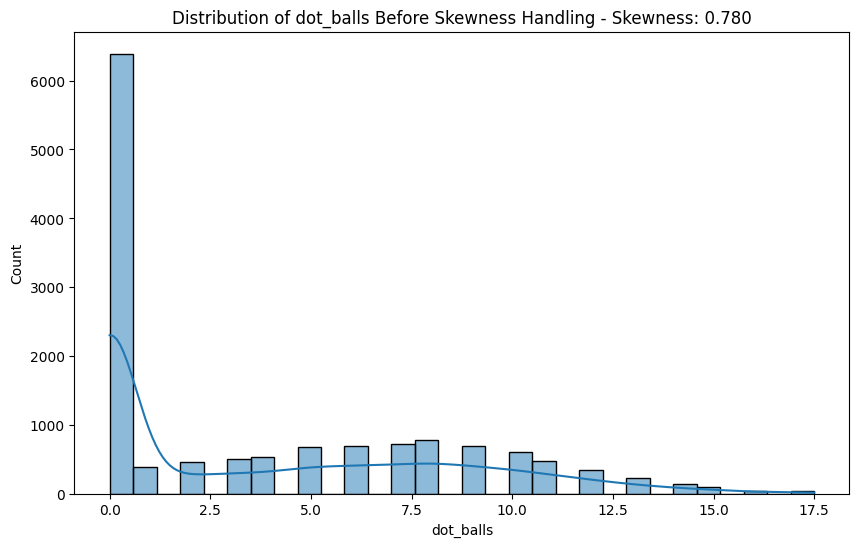

Skewness of economy Before Skewness Handling: 0.515


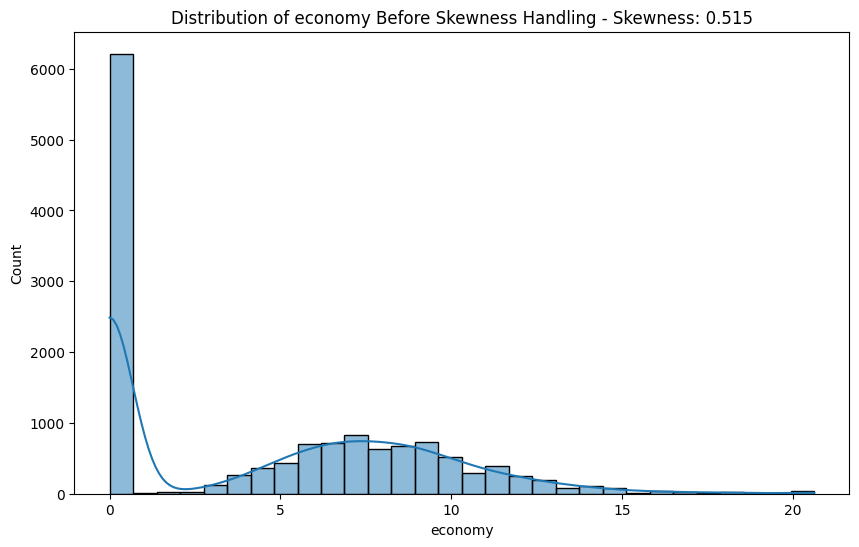

Skewness of catches Before Skewness Handling: 1.673


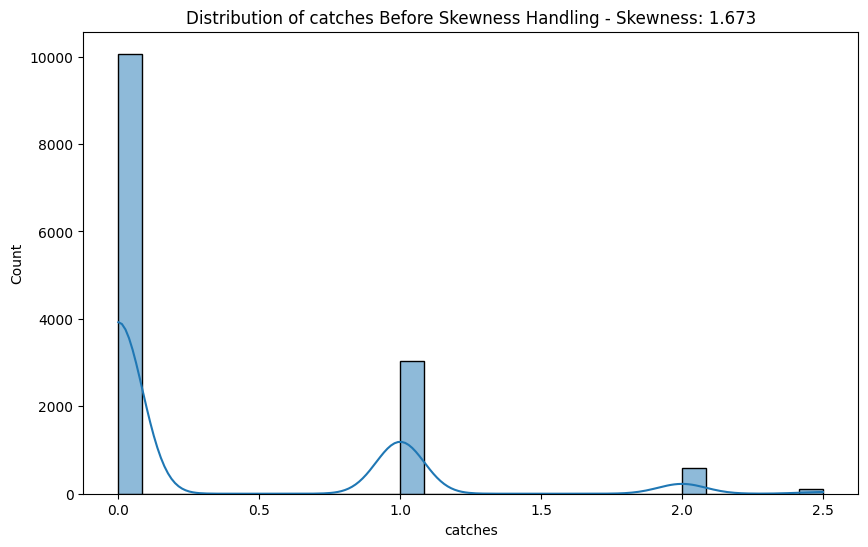

Skewness of run_outs Before Skewness Handling: 0.000


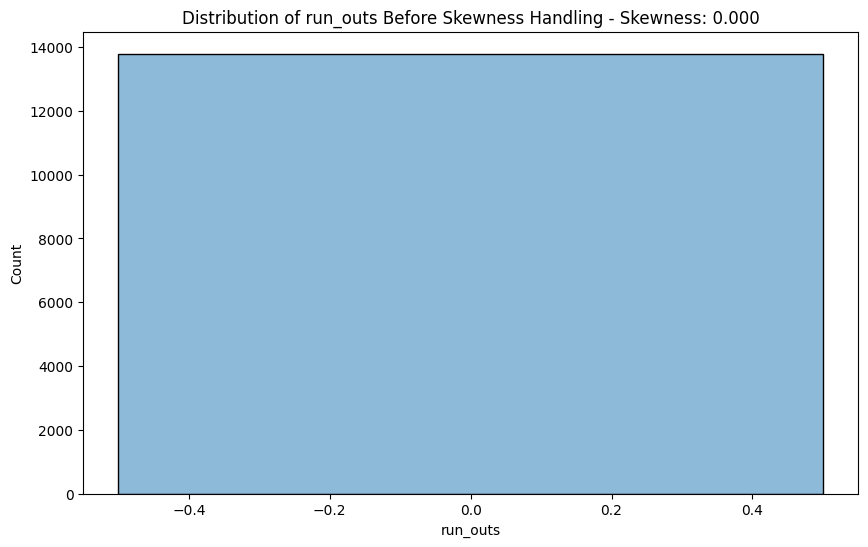

Applying PowerTransformer to total_runs (Skewness: 1.258)
Applying PowerTransformer to balls_faced (Skewness: 1.202)
Applying PowerTransformer to fours (Skewness: 1.330)
Applying PowerTransformer to sixes (Skewness: 1.705)
Applying PowerTransformer to wickets (Skewness: 1.422)
Applying PowerTransformer to catches (Skewness: 1.673)
Skewness After Handling Skewness:
Skewness of total_runs After Skewness Handling: 0.059


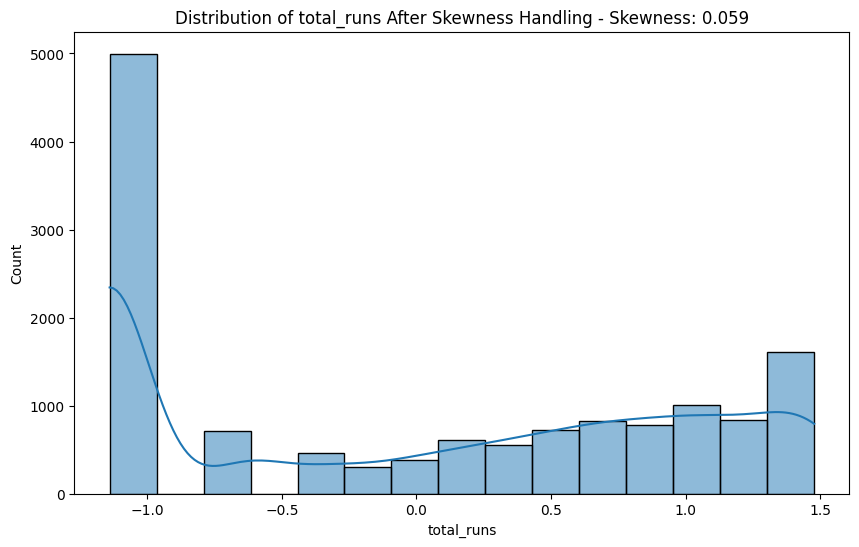

Skewness of balls_faced After Skewness Handling: -0.018


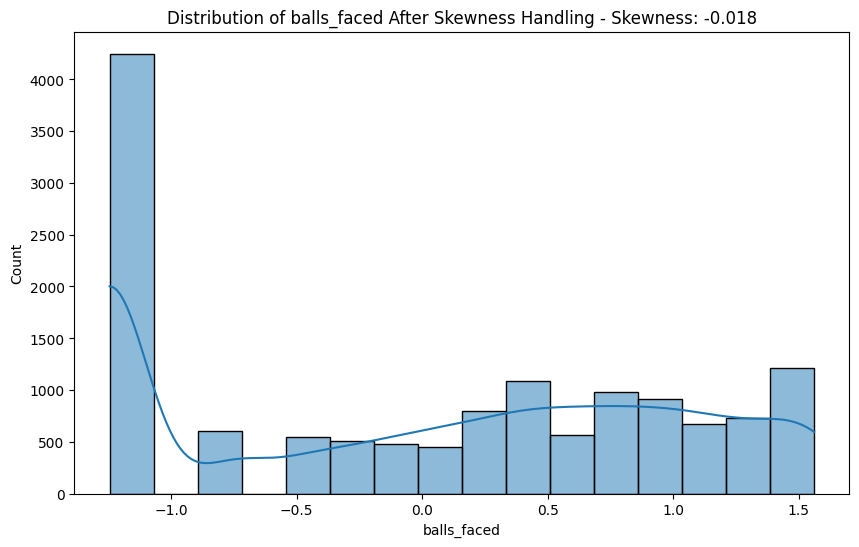

Skewness of fours After Skewness Handling: 0.457


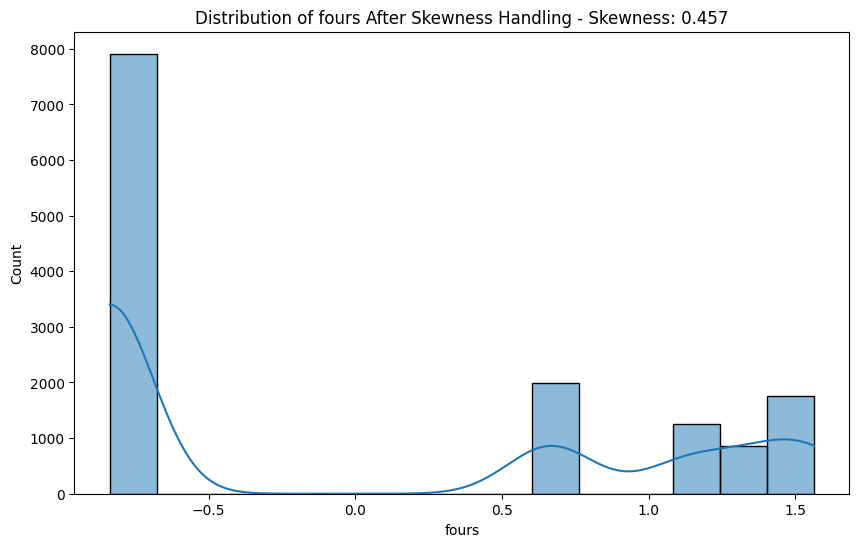

Skewness of sixes After Skewness Handling: 1.109


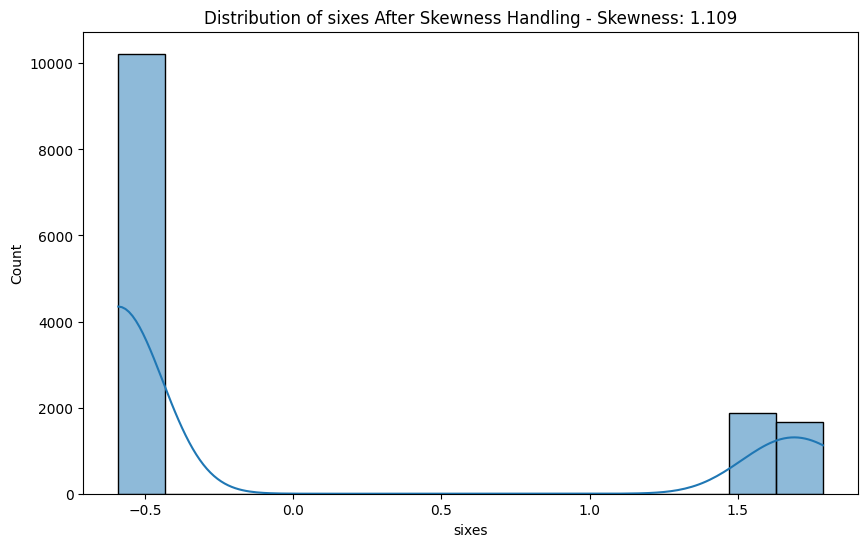

Skewness of strike_rate After Skewness Handling: 0.619


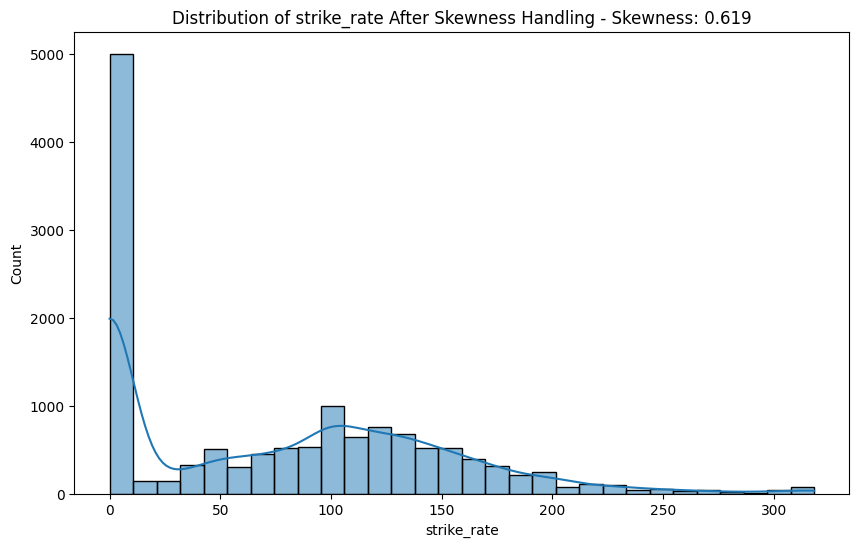

Skewness of balls_bowled After Skewness Handling: 0.191


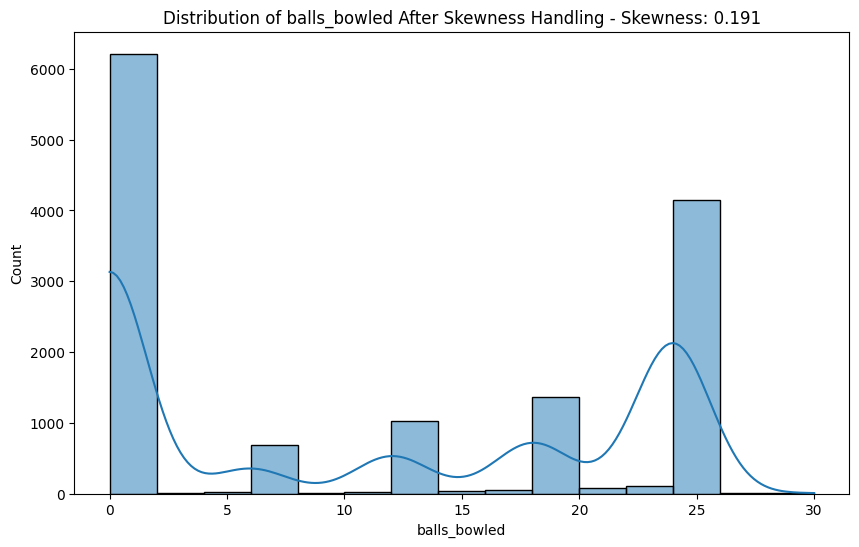

Skewness of runs_conceded After Skewness Handling: 0.552


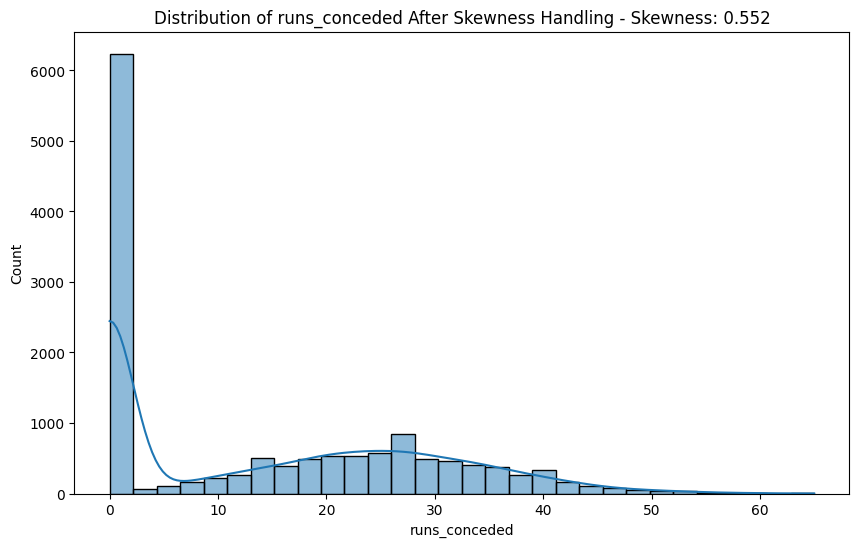

Skewness of wickets After Skewness Handling: 0.829


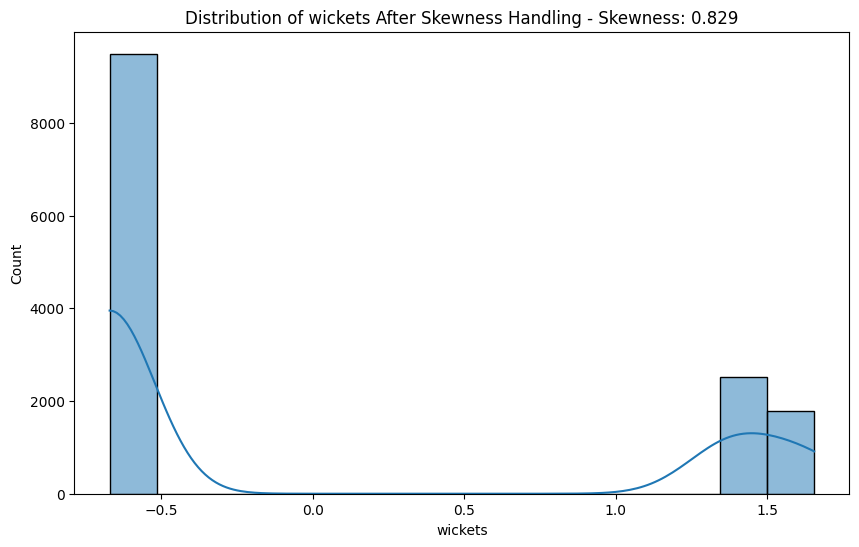

Skewness of dot_balls After Skewness Handling: 0.780


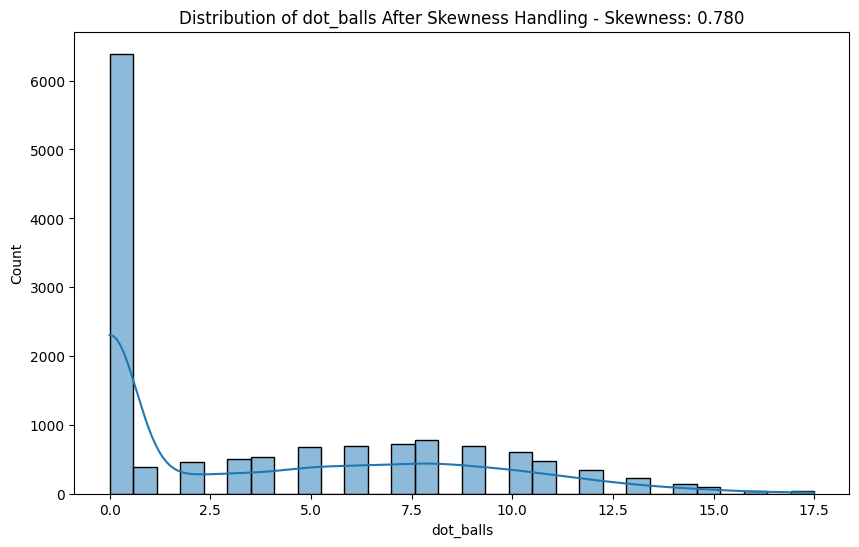

Skewness of economy After Skewness Handling: 0.515


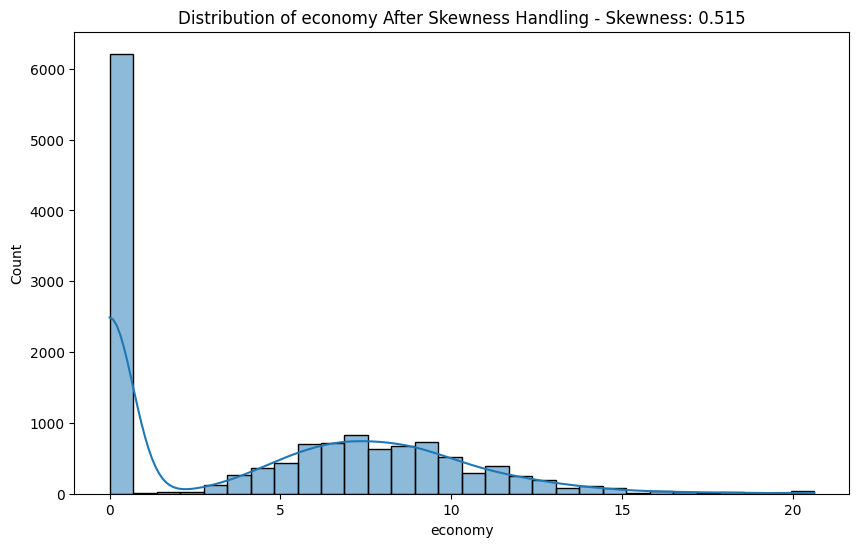

Skewness of catches After Skewness Handling: 1.038


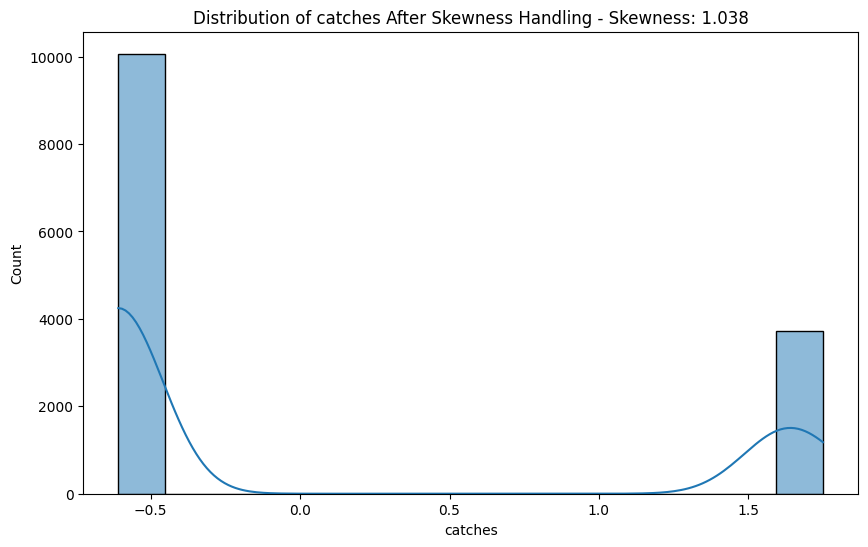

Skewness of run_outs After Skewness Handling: 0.000


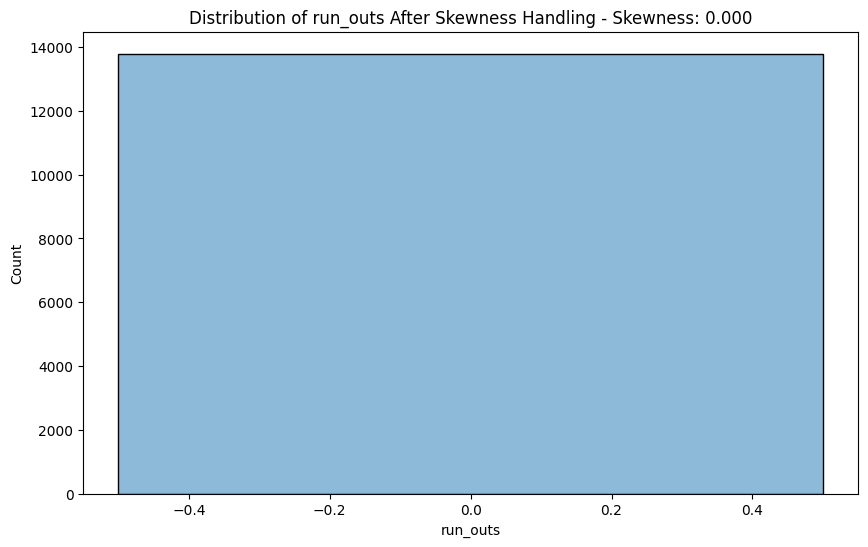

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

# Load the dataset
df=pd.read_csv('Player_Stats_With_Features_HandOtl.csv')

# Identify continuous numerical columns
numerical_cols = df.select_dtypes(include=['float64']).columns

# Function to plot the distribution and calculate skewness
def plot_skewness(df, cols, title_suffix=""):
    for col in cols:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col].dropna(), kde=True)
        skewness = df[col].skew()
        plt.title(f'Distribution of {col} {title_suffix} - Skewness: {skewness:.3f}')
        print(f"Skewness of {col} {title_suffix}: {skewness:.3f}")
        plt.show()

# Plot original distributions and skewness
print("Skewness Before Handling Skewness:")
plot_skewness(df, numerical_cols, "Before Skewness Handling")

# Function to handle skewness using PowerTransformer
def handle_skewness(df, numerical_cols):
    pt = PowerTransformer(method='yeo-johnson', standardize=True)
    for col in numerical_cols:
        if col != 'selling_price':  # Avoid transforming target variable directly
            skewness = df[col].skew()
            if abs(skewness) > 1:  # Apply transformation only for highly skewed columns
                print(f"Applying PowerTransformer to {col} (Skewness: {skewness:.3f})")
                df[col] = pt.fit_transform(df[[col]])
    return df

# Handle skewness
df = handle_skewness(df, numerical_cols)

# Plot transformed distributions and skewness
print("Skewness After Handling Skewness:")
plot_skewness(df, numerical_cols, "After Skewness Handling")

# Save the modified dataset
output_path = 'Player_Stats_With_Features_HandOtl_Sk_Handl.csv'
df.to_csv(output_path, index=False)

Skewness Before Handling Skewness:
Skewness of total_runs Before Skewness Handling: 1.258


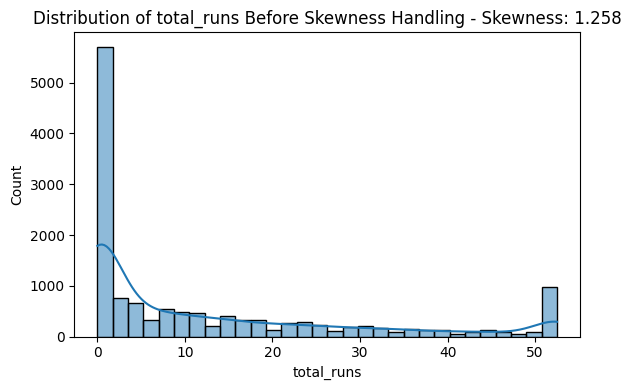

Skewness of balls_faced Before Skewness Handling: 1.202


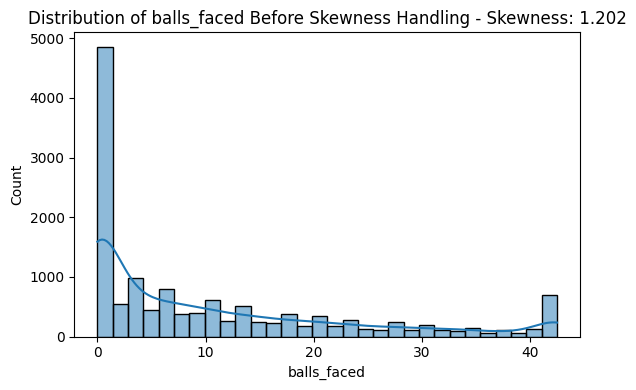

Skewness of fours Before Skewness Handling: 1.330


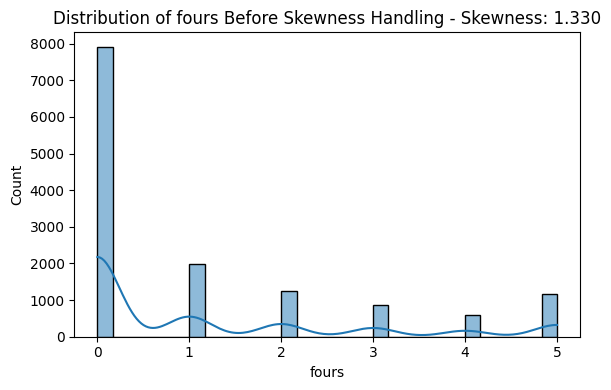

Skewness of sixes Before Skewness Handling: 1.705


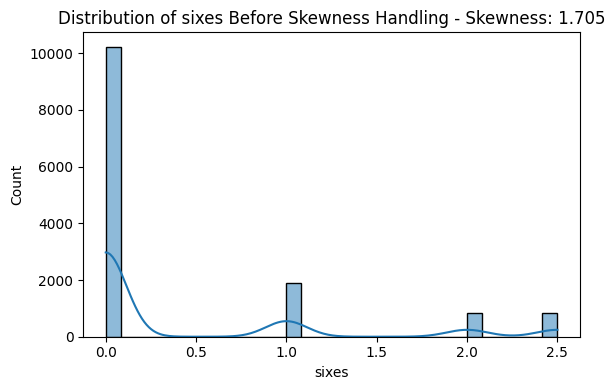

Skewness of strike_rate Before Skewness Handling: 0.619


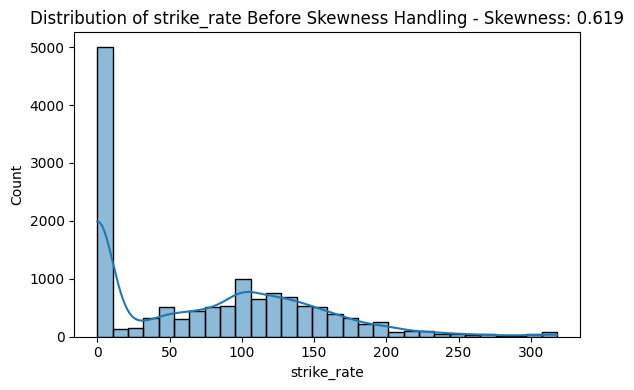

Skewness of balls_bowled Before Skewness Handling: 0.191


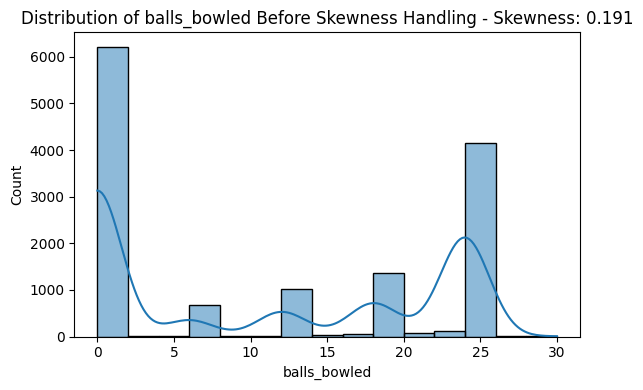

Skewness of runs_conceded Before Skewness Handling: 0.552


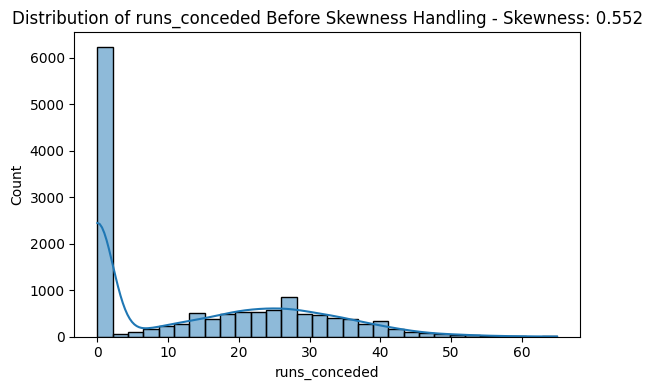

Skewness of wickets Before Skewness Handling: 1.422


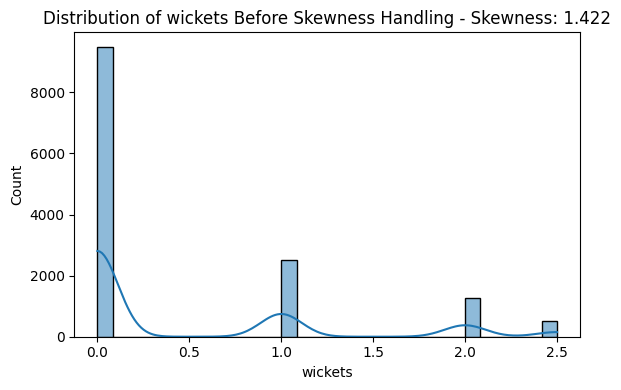

Skewness of dot_balls Before Skewness Handling: 0.780


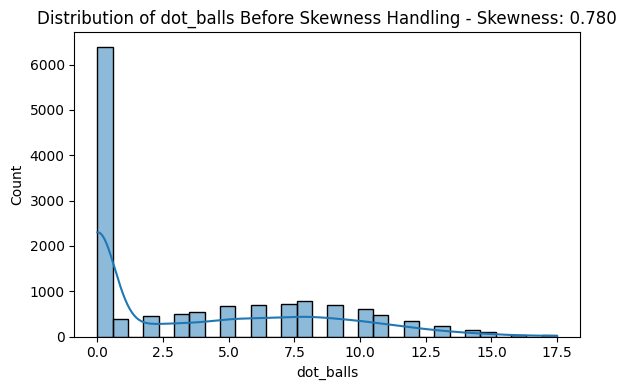

Skewness of economy Before Skewness Handling: 0.515


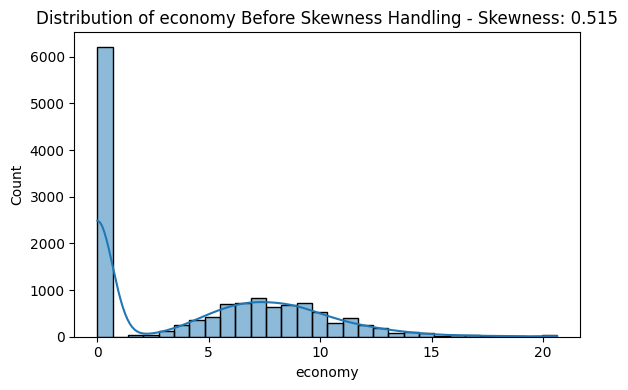

Skewness of catches Before Skewness Handling: 1.673


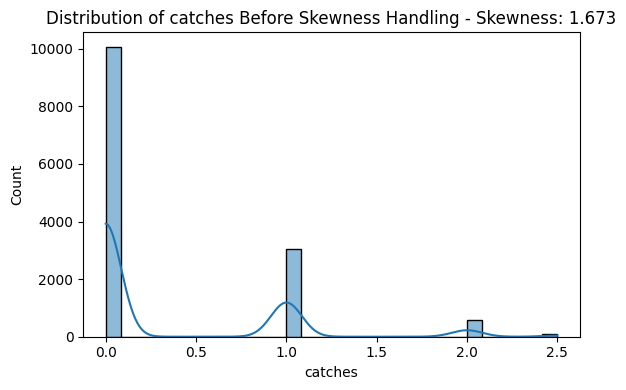

Skewness of run_outs Before Skewness Handling: 0.000


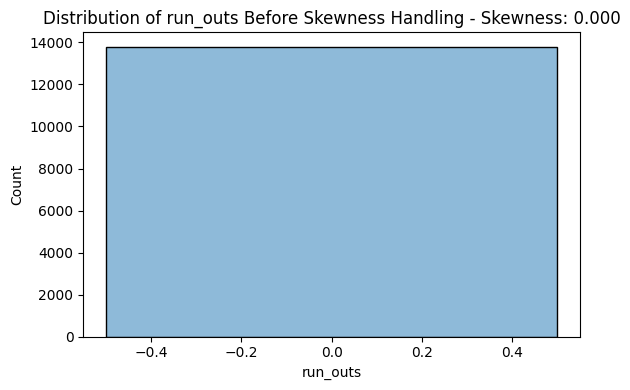

Applying PowerTransformer to total_runs (Skewness: 1.258)
Applying PowerTransformer to balls_faced (Skewness: 1.202)
Applying PowerTransformer to fours (Skewness: 1.330)
Applying PowerTransformer to sixes (Skewness: 1.705)
Applying PowerTransformer to wickets (Skewness: 1.422)
Applying PowerTransformer to catches (Skewness: 1.673)
Skewness After Handling Skewness:
Skewness of total_runs After Skewness Handling: 0.059


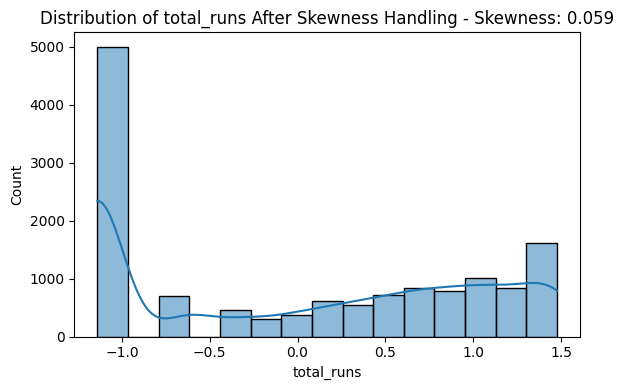

Skewness of balls_faced After Skewness Handling: -0.018


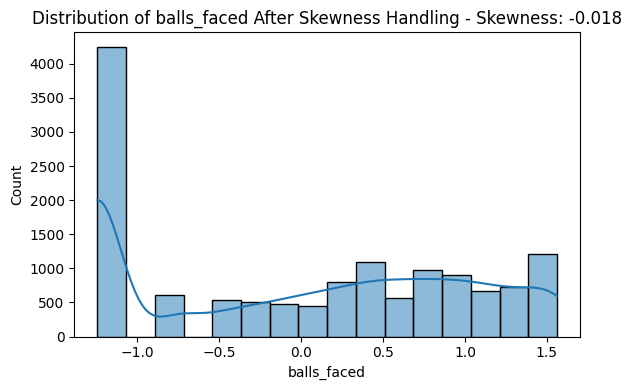

Skewness of fours After Skewness Handling: 0.457


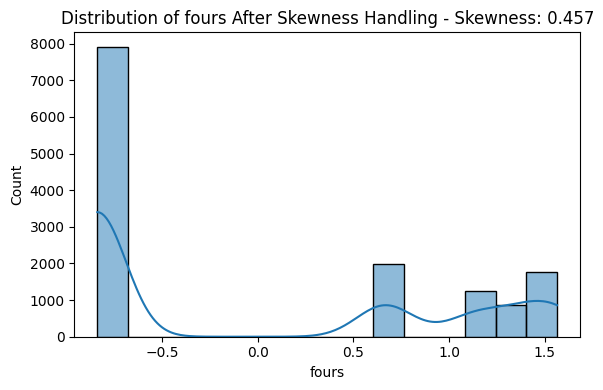

Skewness of sixes After Skewness Handling: 1.109


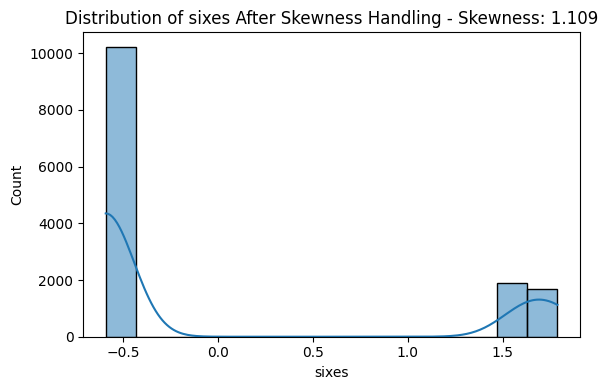

Skewness of strike_rate After Skewness Handling: 0.619


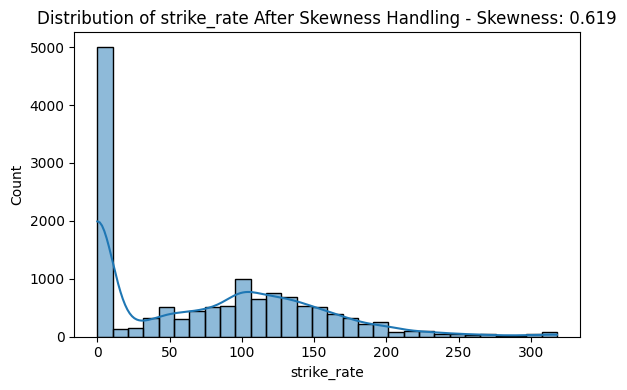

Skewness of balls_bowled After Skewness Handling: 0.191


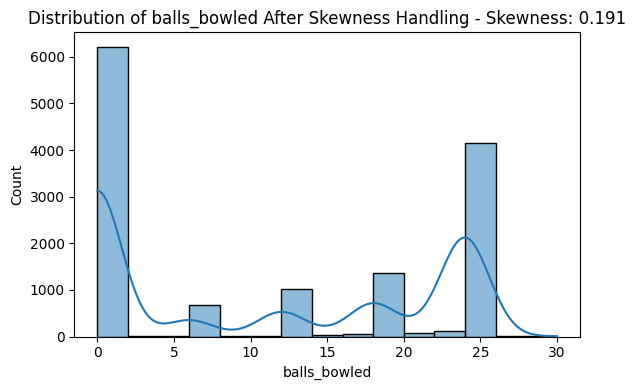

Skewness of runs_conceded After Skewness Handling: 0.552


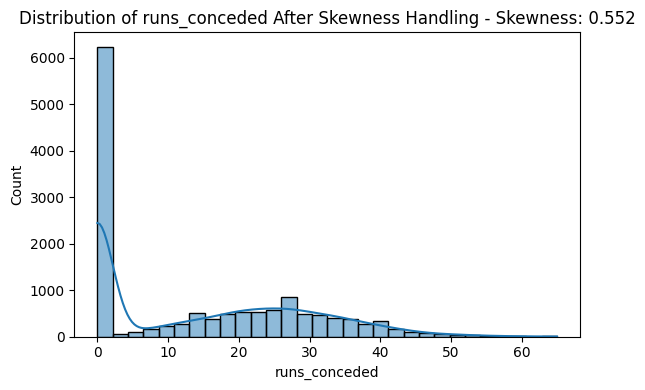

Skewness of wickets After Skewness Handling: 0.829


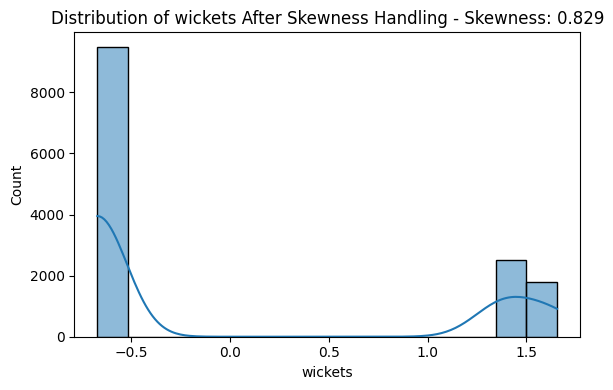

Skewness of dot_balls After Skewness Handling: 0.780


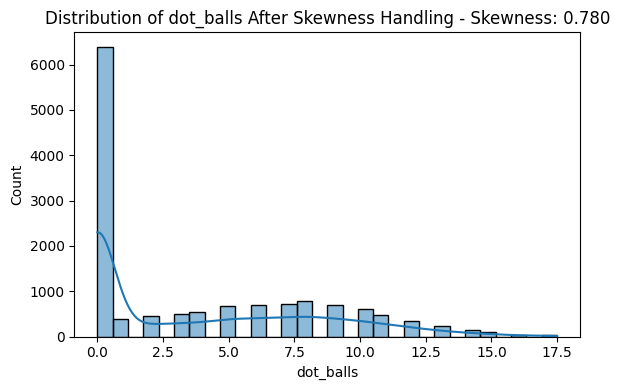

Skewness of economy After Skewness Handling: 0.515


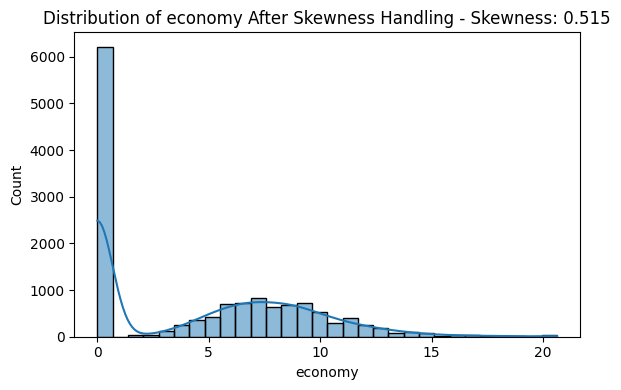

Skewness of catches After Skewness Handling: 1.038


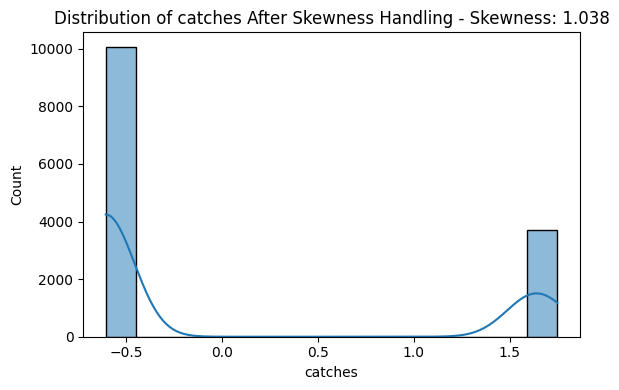

Skewness of run_outs After Skewness Handling: 0.000


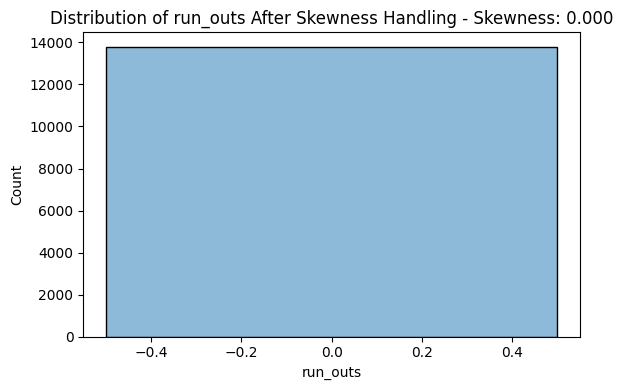

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

# Load the dataset
df = pd.read_csv('Player_Stats_With_Features_HandOtl.csv')

# Identify continuous numerical columns
numerical_cols = df.select_dtypes(include=['float64']).columns

# Function to plot the distribution and calculate skewness
def plot_skewness(df, cols, title_suffix=""):
    for col in cols:
        plt.figure(figsize=(6, 4))  # Reduced figure size
        sns.histplot(df[col].dropna(), kde=True)
        skewness = df[col].skew()
        plt.title(f'Distribution of {col} {title_suffix} - Skewness: {skewness:.3f}')
        print(f"Skewness of {col} {title_suffix}: {skewness:.3f}")
        plt.tight_layout()
        plt.show()

# Plot original distributions and skewness
print("Skewness Before Handling Skewness:")
plot_skewness(df, numerical_cols, "Before Skewness Handling")

# Function to handle skewness using PowerTransformer (Yeo-Johnson)
def handle_skewness(df, numerical_cols):
    for col in numerical_cols:
        skewness = df[col].skew()
        if abs(skewness) > 1:  # Apply transformation only for highly skewed columns
            print(f"Applying PowerTransformer to {col} (Skewness: {skewness:.3f})")
            pt = PowerTransformer(method='yeo-johnson', standardize=True)
            df[col] = pt.fit_transform(df[[col]])
    return df

# Handle skewness
df = handle_skewness(df, numerical_cols)

# Plot transformed distributions and skewness
print("Skewness After Handling Skewness:")
plot_skewness(df, numerical_cols, "After Skewness Handling")

# Save the modified dataset
output_path = 'Player_Stats_With_Features_HandOtl_Sk_Handl.csv'
df.to_csv(output_path, index=False)

Skewness Before Handling Skewness:
Skewness of total_runs Before Skewness Handling: 1.258


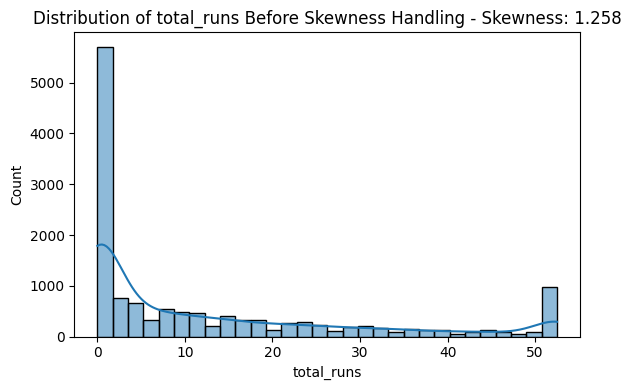

Skewness of balls_faced Before Skewness Handling: 1.202


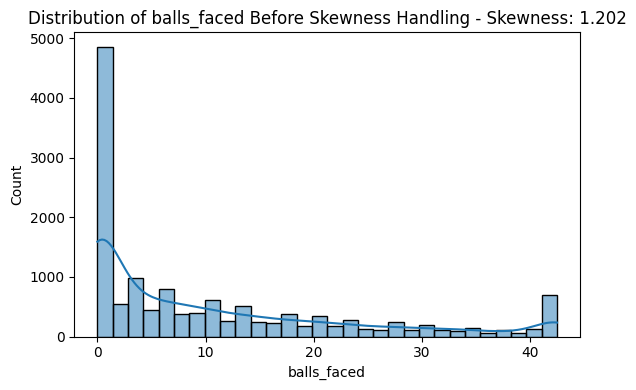

Skewness of fours Before Skewness Handling: 1.330


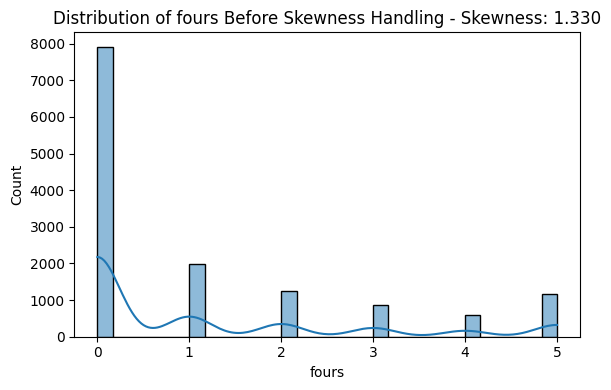

Skewness of sixes Before Skewness Handling: 1.705


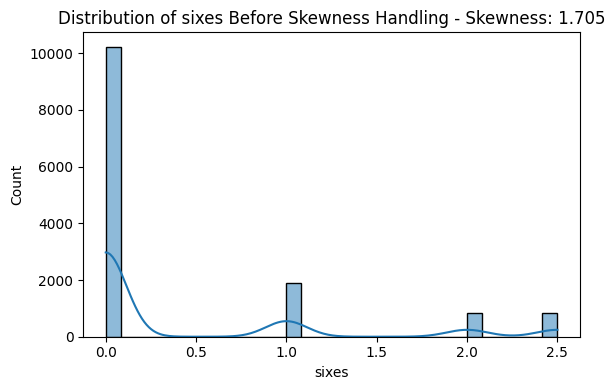

Skewness of strike_rate Before Skewness Handling: 0.619


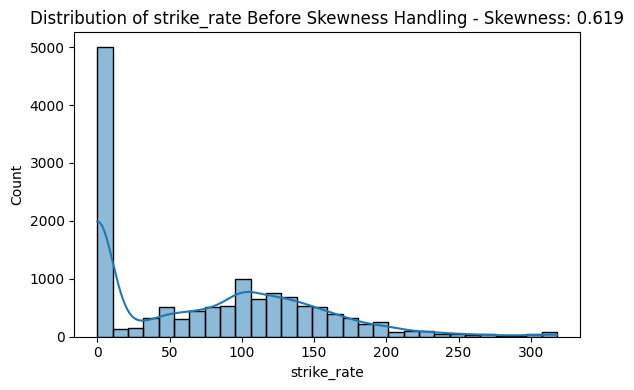

Skewness of balls_bowled Before Skewness Handling: 0.191


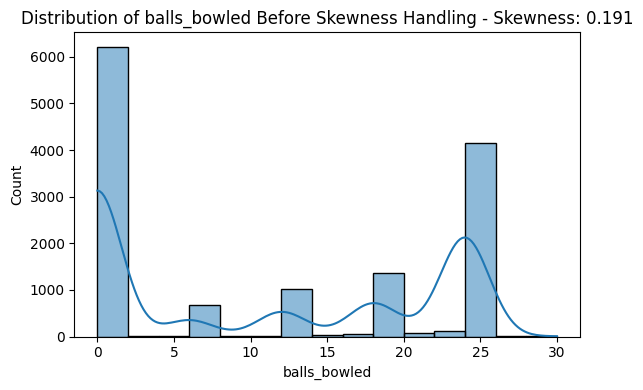

Skewness of runs_conceded Before Skewness Handling: 0.552


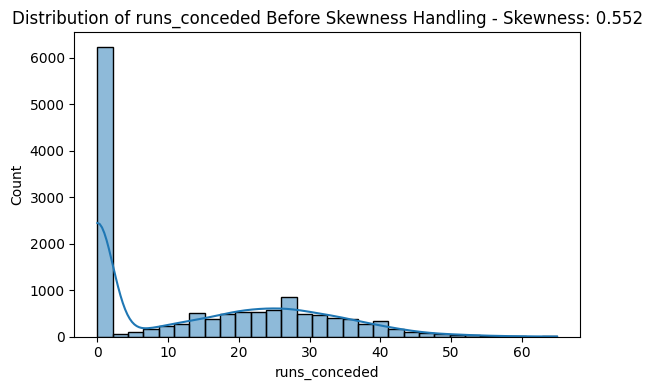

Skewness of wickets Before Skewness Handling: 1.422


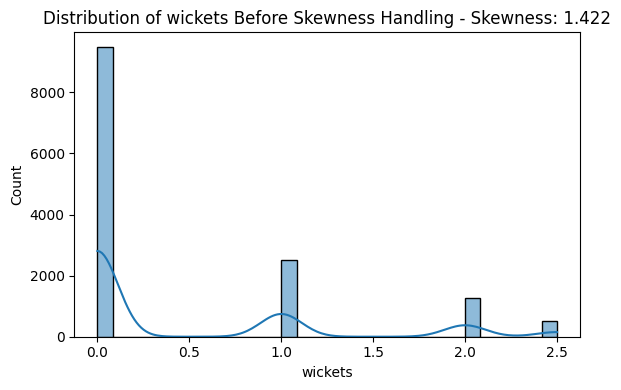

Skewness of dot_balls Before Skewness Handling: 0.780


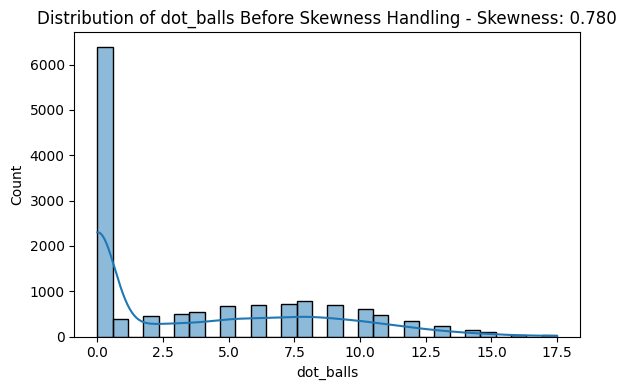

Skewness of economy Before Skewness Handling: 0.515


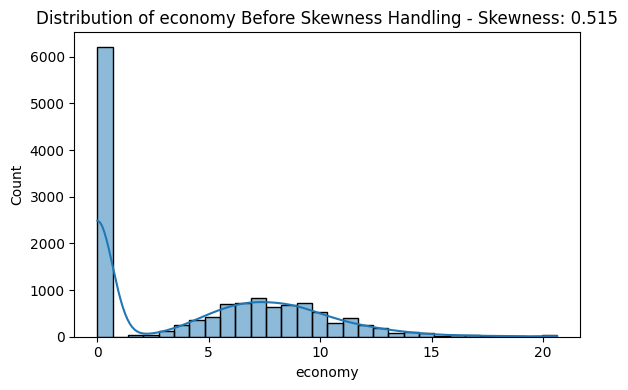

Skewness of catches Before Skewness Handling: 1.673


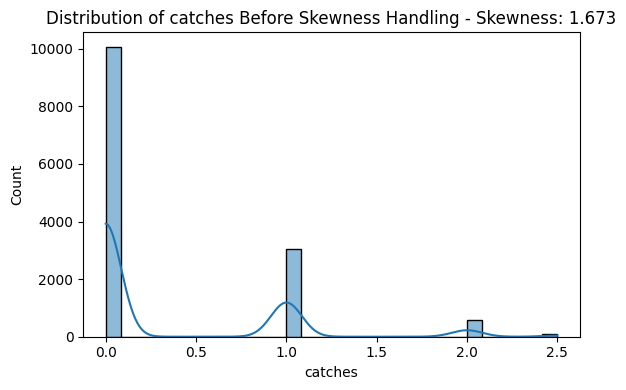

Skewness of run_outs Before Skewness Handling: 0.000


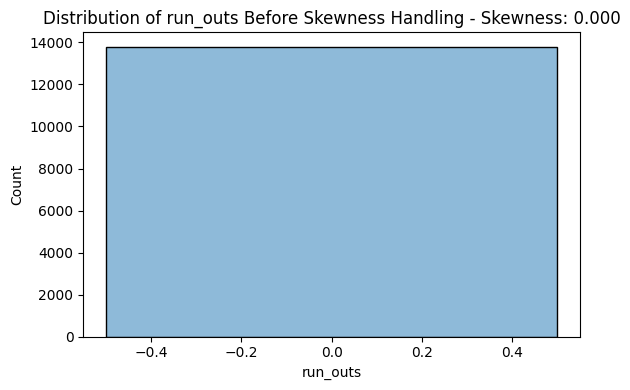

Applying log1p to total_runs (Skewness: 1.258)
Applying log1p to balls_faced (Skewness: 1.202)
Applying log1p to fours (Skewness: 1.330)
Applying log1p to sixes (Skewness: 1.705)
Applying log1p to wickets (Skewness: 1.422)
Applying log1p to catches (Skewness: 1.673)
Skewness After Handling Skewness:
Skewness of total_runs After Skewness Handling: 0.128


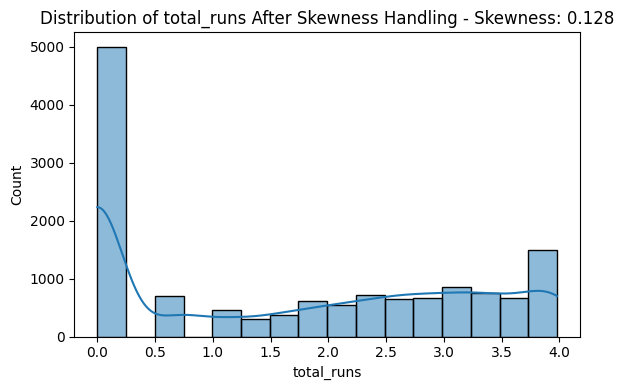

Skewness of balls_faced After Skewness Handling: -0.046


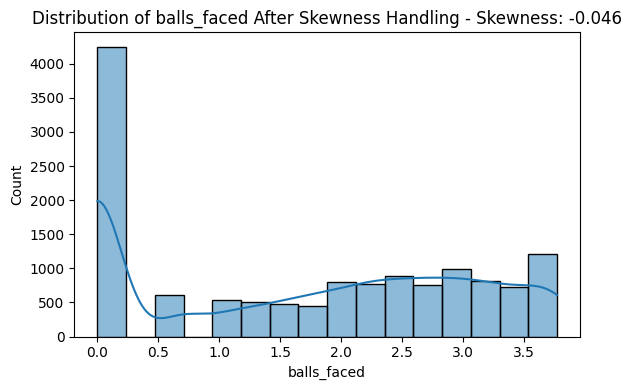

Skewness of fours After Skewness Handling: 0.806


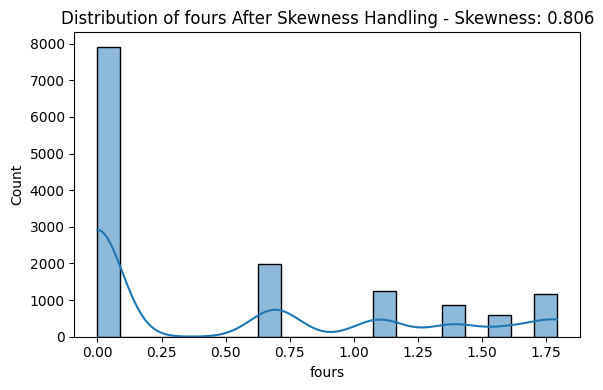

Skewness of sixes After Skewness Handling: 1.402


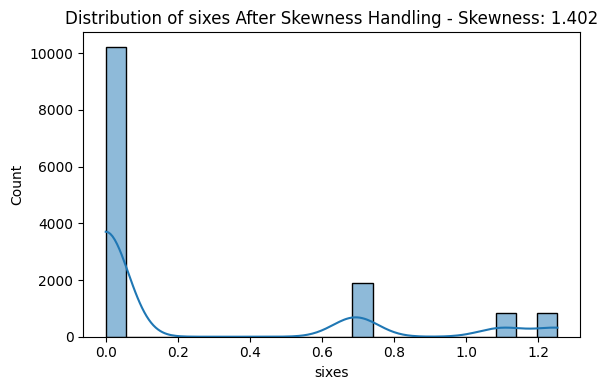

Skewness of strike_rate After Skewness Handling: 0.619


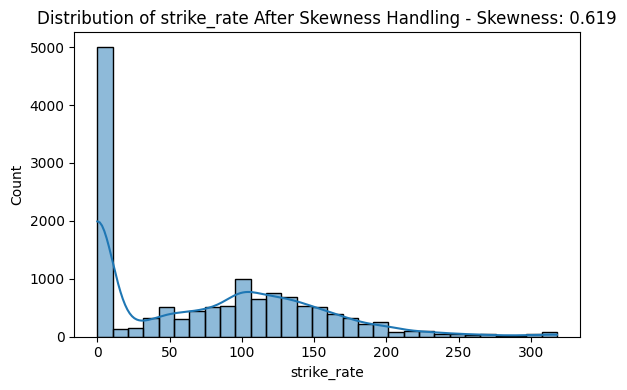

Skewness of balls_bowled After Skewness Handling: 0.191


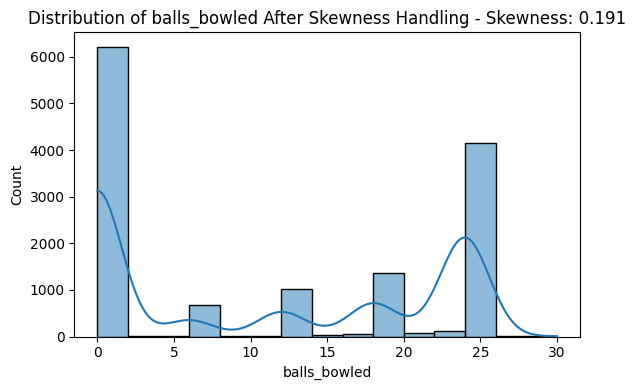

Skewness of runs_conceded After Skewness Handling: 0.552


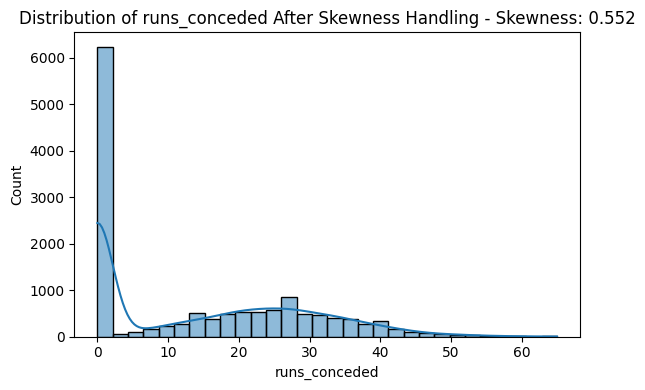

Skewness of wickets After Skewness Handling: 1.105


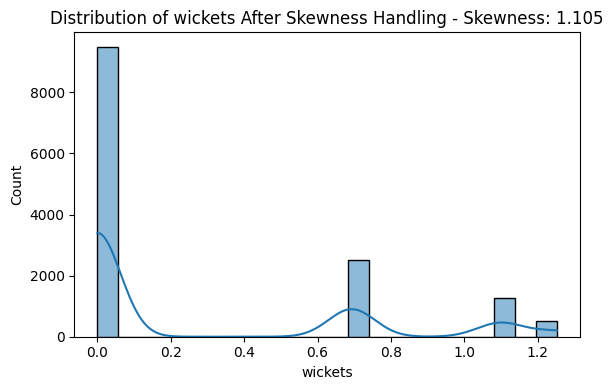

Skewness of dot_balls After Skewness Handling: 0.780


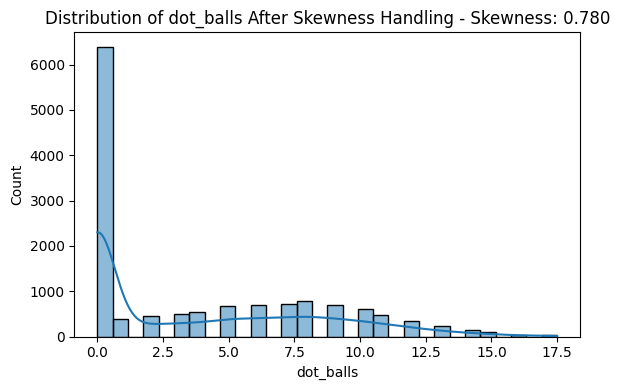

Skewness of economy After Skewness Handling: 0.515


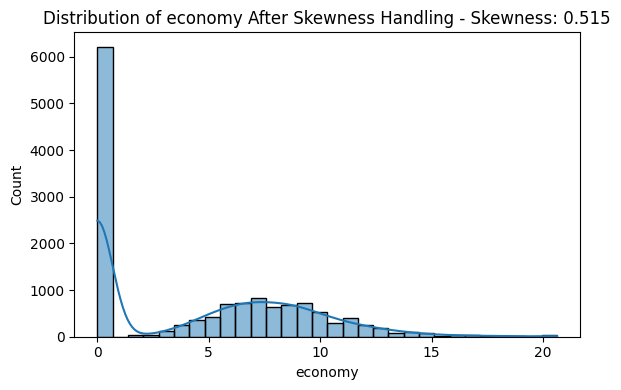

Skewness of catches After Skewness Handling: 1.282


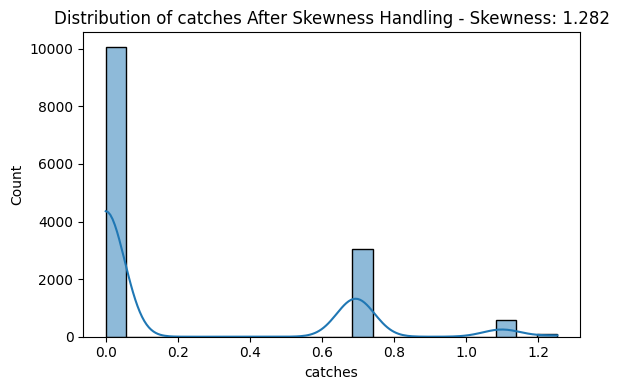

Skewness of run_outs After Skewness Handling: 0.000


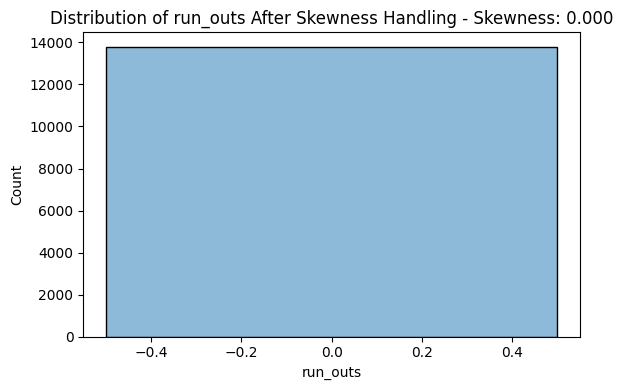

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Player_Stats_With_Features_HandOtl.csv')

# Identify continuous numerical columns
numerical_cols = df.select_dtypes(include=['float64']).columns

# Function to plot the distribution and calculate skewness
def plot_skewness(df, cols, title_suffix=""):
    for col in cols:
        plt.figure(figsize=(6, 4))  # Reduced figure size
        sns.histplot(df[col].dropna(), kde=True)
        skewness = df[col].skew()
        plt.title(f'Distribution of {col} {title_suffix} - Skewness: {skewness:.3f}')
        print(f"Skewness of {col} {title_suffix}: {skewness:.3f}")
        plt.tight_layout()
        plt.show()

# Plot original distributions and skewness
print("Skewness Before Handling Skewness:")
plot_skewness(df, numerical_cols, "Before Skewness Handling")

# Function to handle skewness using log1p
def handle_skewness_with_log1p(df, numerical_cols):
    for col in numerical_cols:
        skewness = df[col].skew()
        if abs(skewness) > 1:
            if (df[col] < 0).any():
                print(f"Skipping {col}: contains negative values (cannot apply log1p)")
                continue
            print(f"Applying log1p to {col} (Skewness: {skewness:.3f})")
            df[col] = np.log1p(df[col])
    return df

# Handle skewness
df = handle_skewness_with_log1p(df, numerical_cols)

# Plot transformed distributions and skewness
print("Skewness After Handling Skewness:")
plot_skewness(df, numerical_cols, "After Skewness Handling")

# Save the modified dataset
output_path = 'Player_Stats_With_Features_HandOtl_Sk_Handl.csv'
df.to_csv(output_path, index=False)


#### Combined log1p and john-son methods of handling skewness

Skewness Before Handling:
Skewness of total_runs Before: 1.258


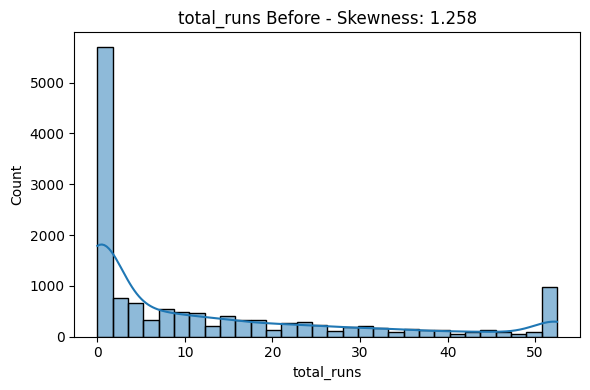

Skewness of balls_faced Before: 1.202


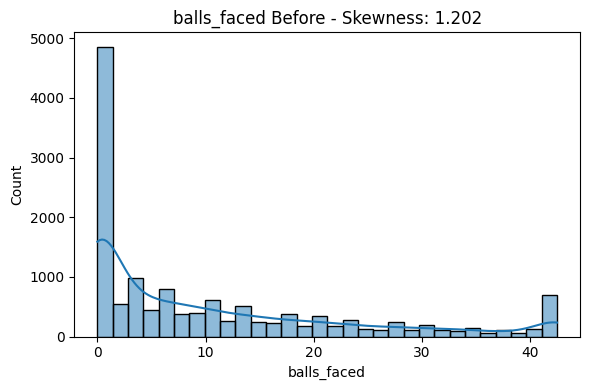

Skewness of fours Before: 1.330


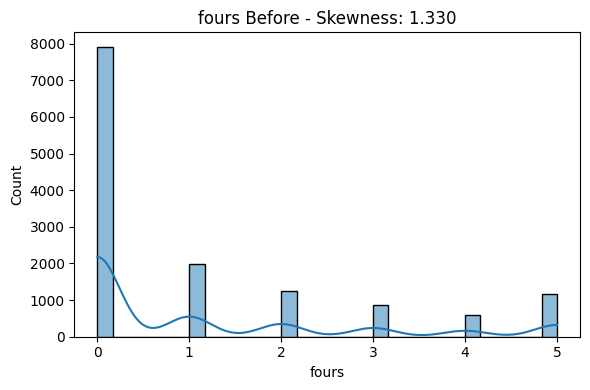

Skewness of sixes Before: 1.705


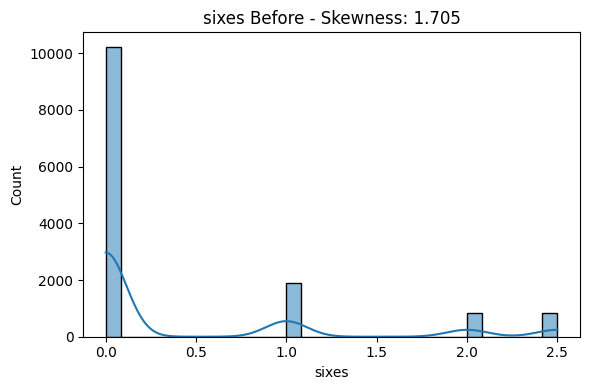

Skewness of strike_rate Before: 0.619


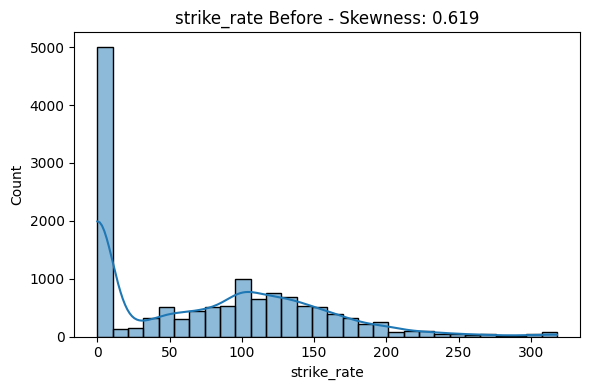

Skewness of balls_bowled Before: 0.191


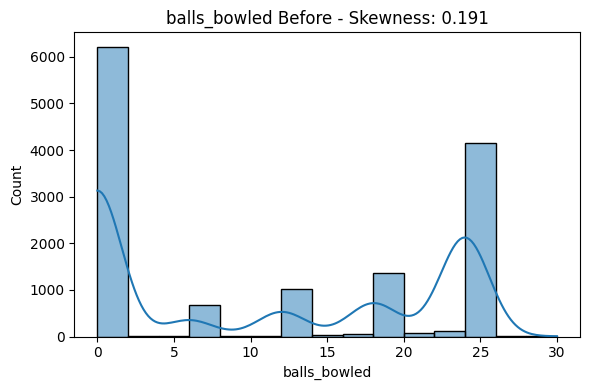

Skewness of runs_conceded Before: 0.552


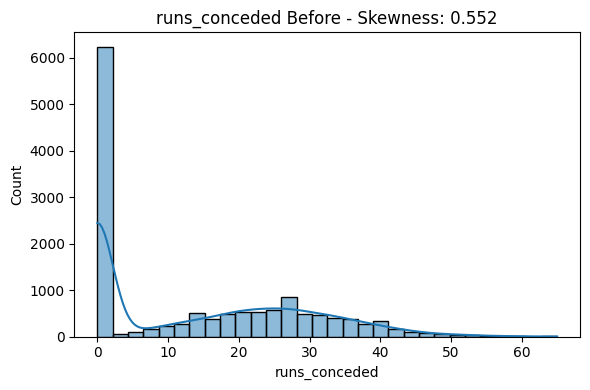

Skewness of wickets Before: 1.422


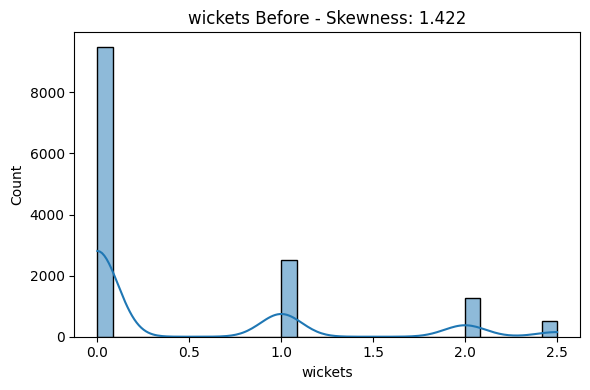

Skewness of dot_balls Before: 0.780


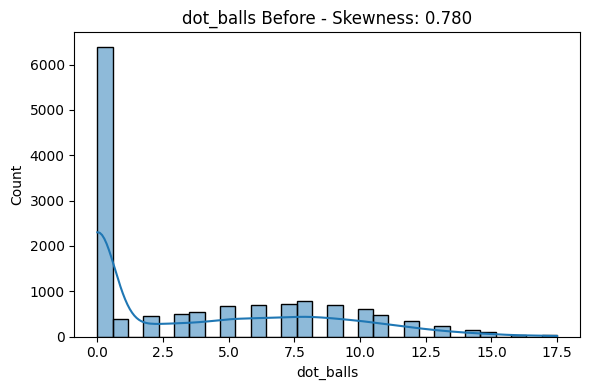

Skewness of economy Before: 0.515


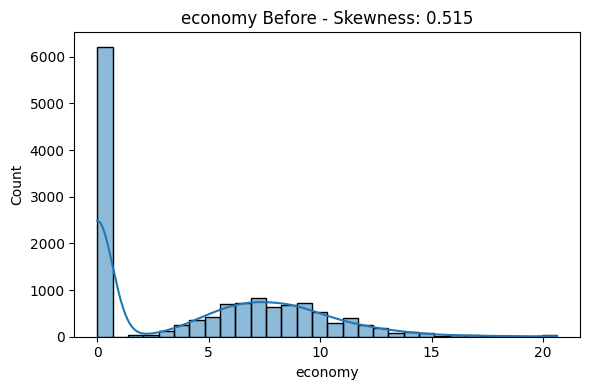

Skewness of catches Before: 1.673


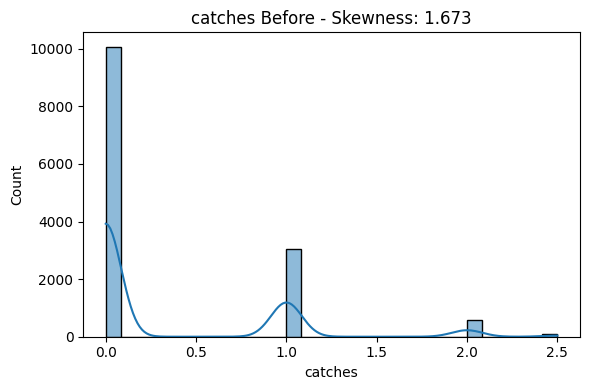

Skewness of run_outs Before: 0.000


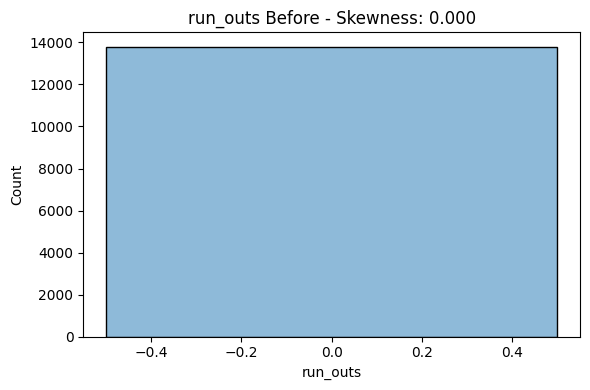

log1p successfully reduced skewness for total_runs (skew=0.128)
log1p successfully reduced skewness for balls_faced (skew=-0.046)
log1p successfully reduced skewness for fours (skew=0.806)
log1p insufficient for sixes, applying PowerTransformer (skew=1.402)
log1p insufficient for wickets, applying PowerTransformer (skew=1.105)
log1p insufficient for catches, applying PowerTransformer (skew=1.282)
Skewness After Handling:
Skewness of total_runs After: 0.128


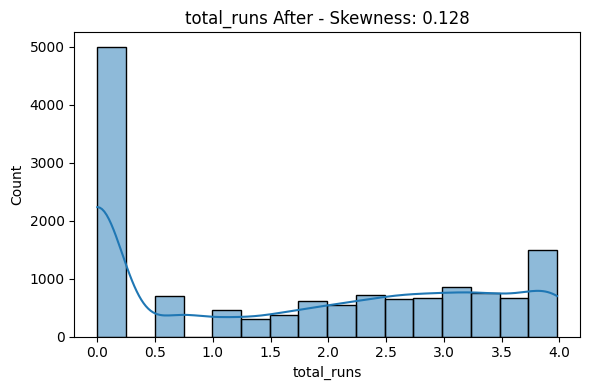

Skewness of balls_faced After: -0.046


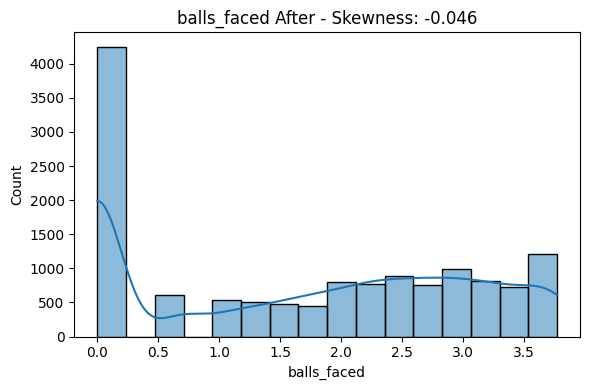

Skewness of fours After: 0.806


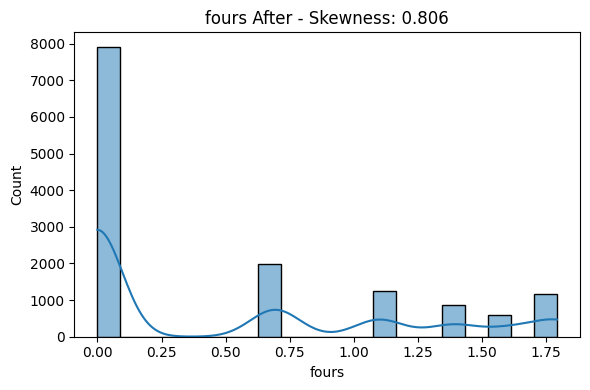

Skewness of sixes After: 1.106


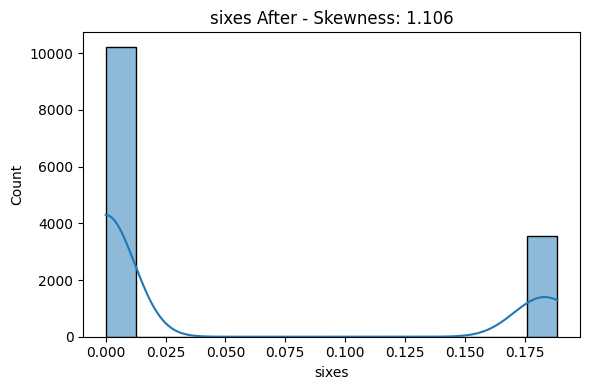

Skewness of strike_rate After: 0.619


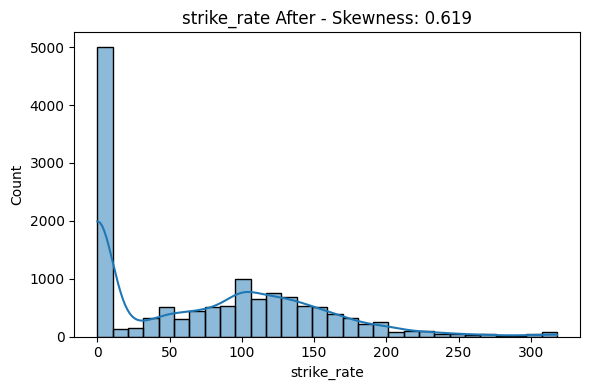

Skewness of balls_bowled After: 0.191


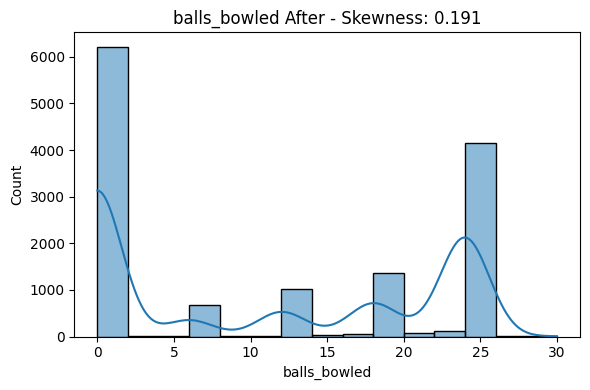

Skewness of runs_conceded After: 0.552


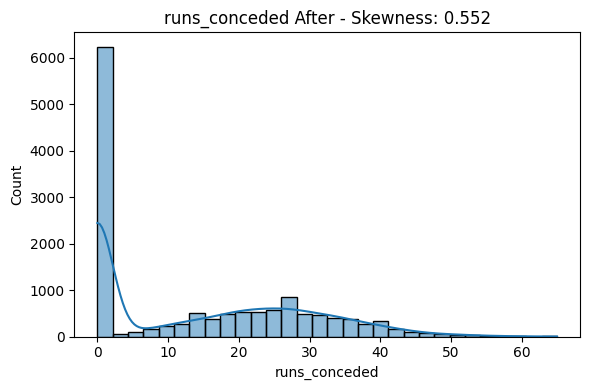

Skewness of wickets After: 0.822


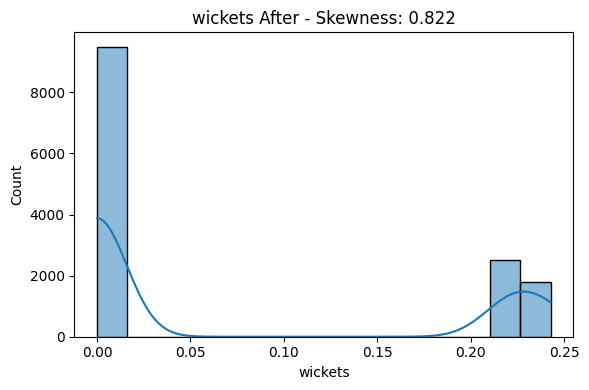

Skewness of dot_balls After: 0.780


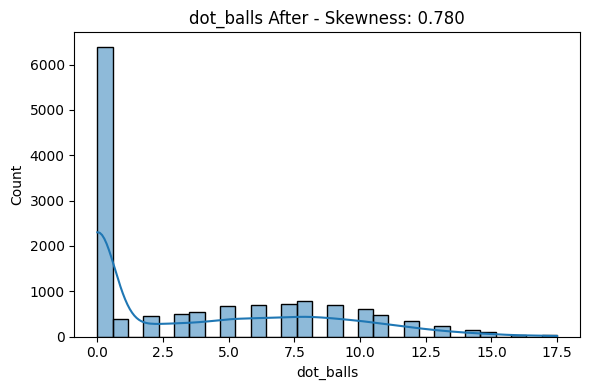

Skewness of economy After: 0.515


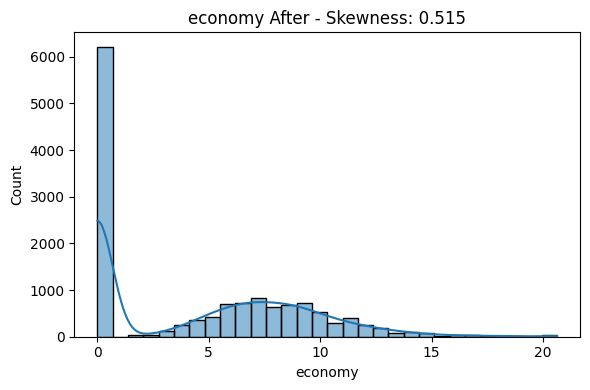

Skewness of catches After: 1.038


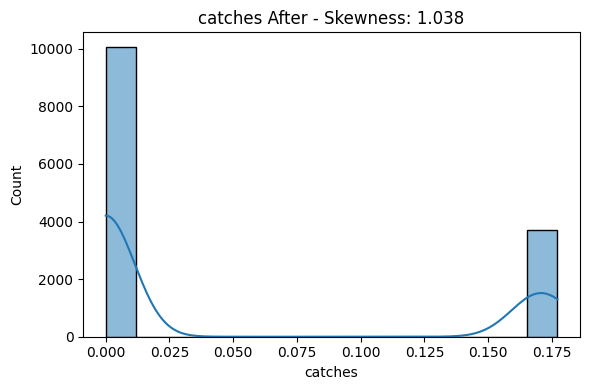

Skewness of run_outs After: 0.000


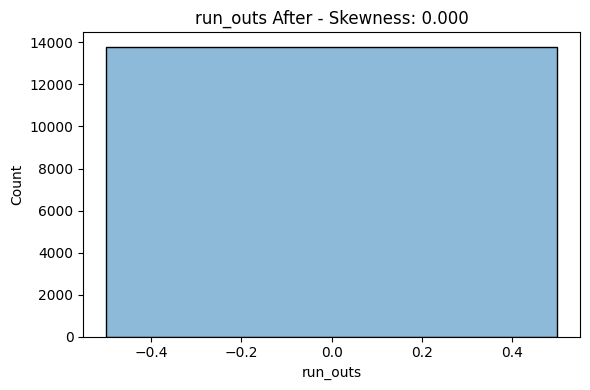

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

# Load the dataset
df = pd.read_csv('Player_Stats_With_Features_HandOtl.csv')

# Identify continuous numerical columns
numerical_cols = df.select_dtypes(include=['float64']).columns

# Function to plot distributions and print skewness
def plot_skewness(df, cols, title_suffix=""):
    for col in cols:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col].dropna(), kde=True)
        skewness = df[col].skew()
        plt.title(f'{col} {title_suffix} - Skewness: {skewness:.3f}')
        print(f"Skewness of {col} {title_suffix}: {skewness:.3f}")
        plt.tight_layout()
        plt.show()

# Before transformation
print("Skewness Before Handling:")
plot_skewness(df, numerical_cols, "Before")

# Handle skewness using log1p and fallback to PowerTransformer
def smart_skewness_handler(df, cols):
    for col in cols:
        original_skew = df[col].skew()
        if abs(original_skew) >= 1:
            if (df[col] < 0).any():
                print(f"Applying PowerTransformer to {col} (skew={original_skew:.3f})")
                pt = PowerTransformer(method='yeo-johnson', standardize=False)
                df[col] = pt.fit_transform(df[[col]])
            else:
                # First try log1p
                df[col] = np.log1p(df[col])
                new_skew = df[col].skew()
                if abs(new_skew) >= 1:
                    print(f"log1p insufficient for {col}, applying PowerTransformer (skew={new_skew:.3f})")
                    pt = PowerTransformer(method='yeo-johnson', standardize=False)
                    df[col] = pt.fit_transform(df[[col]])
                else:
                    print(f"log1p successfully reduced skewness for {col} (skew={new_skew:.3f})")
    return df

# Apply smart skewness handling
df = smart_skewness_handler(df, numerical_cols)

# After transformation
print("Skewness After Handling:")
plot_skewness(df, numerical_cols, "After")

# Save updated dataset
df.to_csv("Player_Stats_With_Features_HandOtl_Sk_Handl.csv", index=False)


In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer

# Load dataset
df = pd.read_csv('Player_Stats_With_Features_HandOtl_Sk_Handl.csv')

# Columns to fix
columns_to_fix = ['sixes', 'catches']

# Fix skewness for specific columns
for col in columns_to_fix:
    skew = df[col].skew()
    print(f"\nOriginal skewness of '{col}': {skew:.3f}")
    
    # Step 1: Try log1p if all values are non-negative
    if (df[col] >= 0).all():
        df[col] = np.log1p(df[col])
        skew_after_log = df[col].skew()
        print(f"After log1p: {skew_after_log:.3f}")
        
        # Step 2: If still skewed, apply PowerTransformer
        if abs(skew_after_log) >= 1:
            pt = PowerTransformer(method='yeo-johnson', standardize=True)
            df[col] = pt.fit_transform(df[[col]])
            print(f"After PowerTransformer: {df[col].skew():.3f}")
    else:
        # If negative values exist, directly apply PowerTransformer
        pt = PowerTransformer(method='yeo-johnson', standardize=True)
        df[col] = pt.fit_transform(df[[col]])
        print(f"After PowerTransformer: {df[col].skew():.3f}")

# Save the modified dataset
df.to_csv('Player_Stats_With_Features_HandOtl_Sk_Handl_Fixed_Sixes_Catches.csv', index=False)



Original skewness of 'sixes': 1.106
After log1p: 1.106
After PowerTransformer: 1.103

Original skewness of 'catches': 1.038
After log1p: 1.037
After PowerTransformer: 1.036


In [1]:
import pandas as pd
df=pd.read_csv('Player_Stats_With_Features_HandOtl_Sk_Handl.csv')

df.columns

Index(['Unnamed: 0', 'match_id', 'player', 'total_runs', 'balls_faced',
       'fours', 'sixes', 'strike_rate', 'balls_bowled', 'runs_conceded',
       'wickets', 'dot_balls', 'economy', 'catches', 'run_outs', 'team',
       'season', 'date', 'venue', 'city', 'batting_team', 'bowling_team',
       'team1', 'team2', 'label'],
      dtype='object')

Accuracy: 0.8999274836838289
Precision: 0.9027679205110007
Recall: 0.9014883061658399
F1 Score: 0.902127659574468

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1347
           1       0.90      0.90      0.90      1411

    accuracy                           0.90      2758
   macro avg       0.90      0.90      0.90      2758
weighted avg       0.90      0.90      0.90      2758



C:\Users\HP\AppData\Local\Temp\ipykernel_10652\3175680212.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')


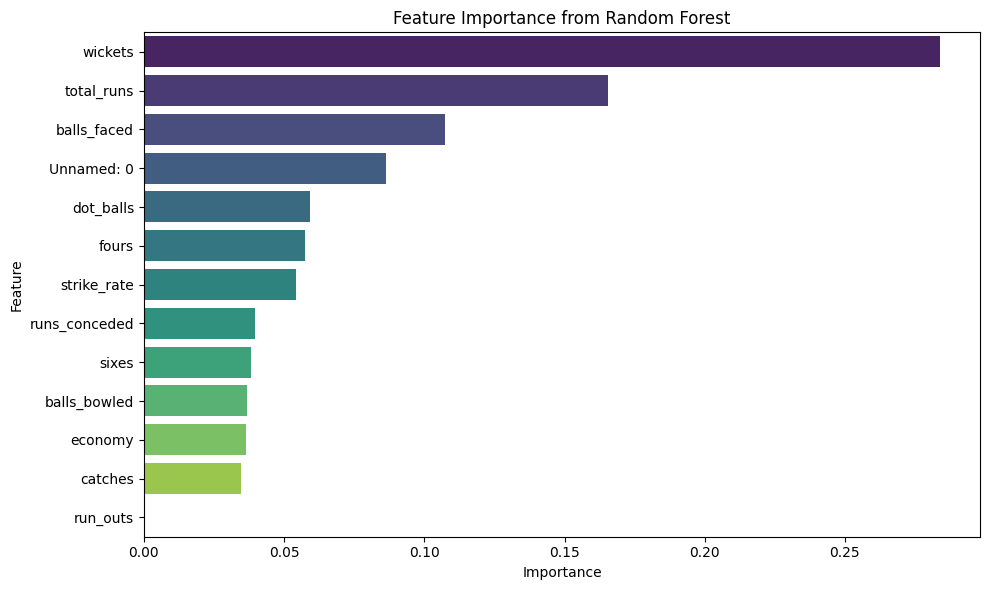

['random_forest_top_players_model.pkl']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
import joblib

# Load the dataset
df = pd.read_csv('Player_Stats_With_Features_HandOtl_Sk_Handl.csv')

# -----------------------------
# Feature Selection
# -----------------------------

# Drop columns that are identifiers or not useful for training
drop_cols = ['match_id', 'player', 'team', 'season', 'date', 'venue', 'city',
             'batting_team', 'bowling_team', 'team1', 'team2']

# Select numeric features + label
df_model = df.drop(columns=drop_cols)

# Drop rows with missing values (if any)
df_model.dropna(inplace=True)

# Define X and y
X = df_model.drop('label', axis=1)
y = df_model['label']

# -----------------------------
# Split into training and test sets
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# Train Random Forest Classifier
# -----------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# -----------------------------
# Evaluation
# -----------------------------
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -----------------------------
# Feature Importance Plot
# -----------------------------
importances = model.feature_importances_
feature_names = X.columns

# Create DataFrame for feature importance
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()

# -----------------------------
# Save the trained model
# -----------------------------
joblib.dump(model, 'random_forest_top_players_model.pkl')


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 290}
Accuracy: 0.9093546047860769
Precision: 0.9073684210526316
Recall: 0.9163713678242381
F1 Score: 0.9118476727785614

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      1347
           1       0.91      0.92      0.91      1411

    accuracy                           0.91      2758
   macro avg       0.91      0.91      0.91      2758
weighted avg       0.91      0.91      0.91      2758



C:\Users\HP\AppData\Local\Temp\ipykernel_13064\738521448.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')


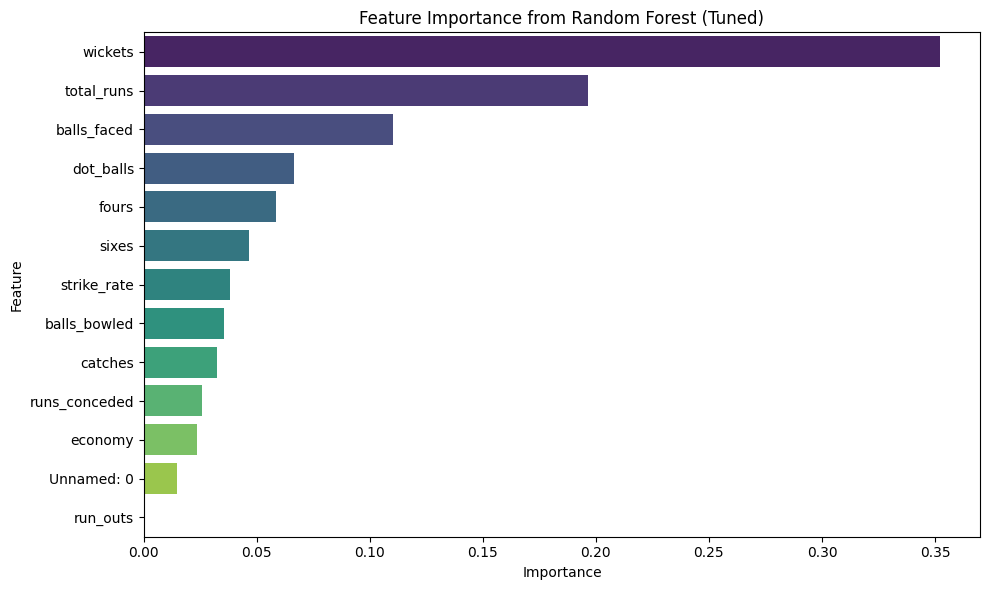

['random_forest_top_players_model_tuned_O.pkl']

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
import joblib
from scipy.stats import randint

# Load dataset
df = pd.read_csv('Player_Stats_With_Features_HandOtl_Sk_Handl.csv')

# Drop irrelevant columns
drop_cols = ['match_id', 'player', 'team', 'season', 'date', 'venue', 'city',
             'batting_team', 'bowling_team', 'team1', 'team2']
df_model = df.drop(columns=drop_cols)
df_model.dropna(inplace=True)

# Define X and y
X = df_model.drop('label', axis=1)
y = df_model['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# Random Forest with Hyperparameter Tuning
# -----------------------------
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=20, cv=5, scoring='f1', verbose=1, random_state=42, n_jobs=-1
)

random_search.fit(X_train, y_train)

# Best model
model = random_search.best_estimator_

# -----------------------------
# Evaluation
# -----------------------------
y_pred = model.predict(X_test)

print("Best Parameters:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -----------------------------
# Feature Importance Plot
# -----------------------------
importances = model.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest (Tuned)')
plt.tight_layout()
plt.show()

# -----------------------------
# Save model
# -----------------------------
joblib.dump(model, 'random_forest_top_players_model_tuned_O.pkl')


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Player_Stats_With_Features_HandOtl_Sk_Handl.csv')

# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Save the cleaned dataset
df.to_csv('Player_Stats_With_Features_HandOtl_Sk_Handl_Cleaned.csv', index=False)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 108}
Accuracy: 0.9100797679477882
Precision: 0.9097956307258633
Recall: 0.9149539333805812
F1 Score: 0.9123674911660777

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      1347
           1       0.91      0.91      0.91      1411

    accuracy                           0.91      2758
   macro avg       0.91      0.91      0.91      2758
weighted avg       0.91      0.91      0.91      2758



C:\Users\HP\AppData\Local\Temp\ipykernel_13064\3994678090.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')


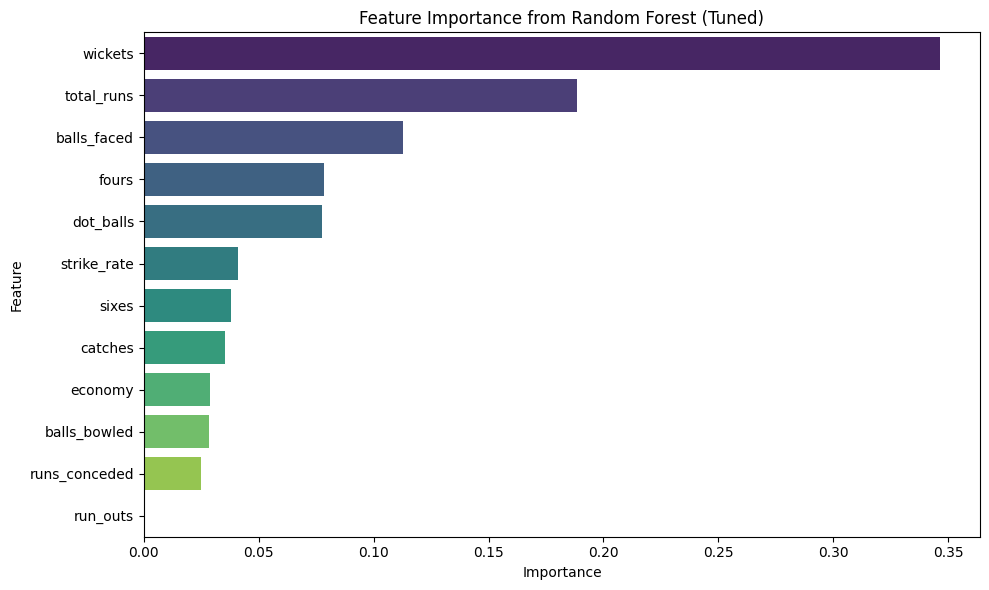

['random_forest_top_players_model_tuned_O_N.pkl']

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
import joblib
from scipy.stats import randint

# Load dataset
df = pd.read_csv('Player_Stats_With_Features_HandOtl_Sk_Handl_Cleaned.csv')

# Drop irrelevant columns
drop_cols = ['match_id', 'player', 'team', 'season', 'date', 'venue', 'city',
             'batting_team', 'bowling_team', 'team1', 'team2']
df_model = df.drop(columns=drop_cols)
df_model.dropna(inplace=True)

# Define X and y
X = df_model.drop('label', axis=1)
y = df_model['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# Random Forest with Hyperparameter Tuning
# -----------------------------
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=20, cv=5, scoring='f1', verbose=1, random_state=42, n_jobs=-1
)

random_search.fit(X_train, y_train)

# Best model
model = random_search.best_estimator_

# -----------------------------
# Evaluation
# -----------------------------
y_pred = model.predict(X_test)

print("Best Parameters:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -----------------------------
# Feature Importance Plot
# -----------------------------
importances = model.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest (Tuned)')
plt.tight_layout()
plt.show()

# -----------------------------
# Save model
# -----------------------------
joblib.dump(model, 'random_forest_top_players_model_tuned_O_N.pkl')